## Project Description
###### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

###### Key attributes of the database

###### The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

### Fuel Type Aggregation

###### We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [6]:
import pandas as pd # For Data  Wrangling Purpose
import numpy as np  # For Basic Computation Libraries
import seaborn as sns # For Visualization Techniques
import matplotlib.pyplot as plt #Ploting Graphes
import warnings               # Filter Warnings
warnings.filterwarnings('ignore')

In [7]:
#Read Dataset  
#Reading CSV File
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [8]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

### About DataSet

- In Our DataSet We Have 907 Rows And 27 Columns.
- In 5 Columns Data Not Present -other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh
- 1 Column HAve Only 1 Value - other_fuel2
- estimated_generation_gwh - Empty
- wepp_id - Empty
- other_fuel2 - 98% data missing
- other_fuel3 - Empty 
- owner - More than 60 % data missing
- year_of_capacity_data - Missing data with single unique value
- country - non relevalent info
- country_long - non relevalent info
- gppd_idnr -non relevalent info
- url - No missing value but of no use
 

In [10]:
for i in df.columns:
    print(df[i].value_counts())

country
IND    907
Name: count, dtype: int64
country_long
India    907
Name: count, dtype: int64
name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: count, Length: 907, dtype: int64
gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: count, Length: 907, dtype: int64
capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64
latitude
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970 

- In Our Data Some Columns Have Only Single Value Present. There Is No Unique Value Present So This Is Basically Not UseFull Or Model Building So We Delet That Columns

In [11]:
# Droping Country Columne  There Is NO Unique Values Present In 
df = df.drop(columns =["country"])
# Droping country_long Columne  There Is NO Unique Values Present In
df = df.drop(columns =["country_long"])
# Droping other_fuel2 Columne  There Is NO Values Present In
df = df.drop(columns =["other_fuel2"])
# Droping other_fuel3 Columne  There Is NO Values Present In
df = df.drop(columns =["other_fuel3"])
# Droping wepp_id Columne  There Is NO Values Present In
df = df.drop(columns =["wepp_id"])
# Droping generation_gwh_2013 Columne  There Is NO Values Present In
df = df.drop(columns =["generation_gwh_2013"])
# Droping generation_gwh_2019 Columne  There Is NO Values Present In
df = df.drop(columns =["generation_gwh_2019"])
# Droping estimated_generation_gwh Columne  There Is NO Values Present In
df = df.drop(columns =["estimated_generation_gwh"])
# Droping url Columne  Url Dont Requiered For ModelBuilding
df =df.drop(columns = ["url"])
# Droping generation_data_source Columne  There Is NO Unique Values Present In Data
df =df.drop(columns = ["generation_data_source"])

df =df.drop(columns = ["gppd_idnr"])

df =df.drop(columns = ["year_of_capacity_data"])



In [12]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].fillna(df[i].mode()[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             861 non-null    float64
 3   longitude            861 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   owner                907 non-null    object 
 8   source               907 non-null    object 
 9   geolocation_source   907 non-null    object 
 10  generation_gwh_2014  398 non-null    float64
 11  generation_gwh_2015  422 non-null    float64
 12  generation_gwh_2016  434 non-null    float64
 13  generation_gwh_2017  440 non-null    float64
 14  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [14]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [15]:
for i in df.columns:
    if df[i].dtype =='float':
        if i != "commissioning_year":
            df[i] = df[i].fillna(df[i].mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             907 non-null    float64
 3   longitude            907 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   owner                907 non-null    object 
 8   source               907 non-null    object 
 9   geolocation_source   907 non-null    object 
 10  generation_gwh_2014  907 non-null    float64
 11  generation_gwh_2015  907 non-null    float64
 12  generation_gwh_2016  907 non-null    float64
 13  generation_gwh_2017  907 non-null    float64
 14  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [17]:
for i in df.columns:
    if df[i].dtype == 'float':
        df[i] = df[i].fillna(df[i].mode()[0])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             907 non-null    float64
 3   longitude            907 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   907 non-null    float64
 7   owner                907 non-null    object 
 8   source               907 non-null    object 
 9   geolocation_source   907 non-null    object 
 10  generation_gwh_2014  907 non-null    float64
 11  generation_gwh_2015  907 non-null    float64
 12  generation_gwh_2016  907 non-null    float64
 13  generation_gwh_2017  907 non-null    float64
 14  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [19]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,15.734928,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2014.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2015.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#### Observation:
- Biggest Powerplant has power generation capacity of 4760 MW.
- In each Generation-GWHours columns Mean is greater than Median.
- Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
- Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.
- Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

##### We have two different Target feature for regression and classification model. LetStart exploring both Target Feature

In [20]:
print(df["capacity_mw"].min())
print(df["capacity_mw"].max())

0.0
4760.0


In [21]:
df.loc[df.capacity_mw ==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,Oil,2015.0,Tata BP Solar India Limited,Tata BP Solar India Limited,Industry About,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099


In [22]:
df.loc[df.capacity_mw ==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Acc Acc ltd,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0


#### Comment :
- <b> Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW.</b> As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
- Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. <b>This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.</b>

In [23]:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

- Maximum Number Of Powerplant Are Coal Base Powerplant Followed By Hydro Energy Based Powerplants.
- Minimum Number Of Power Plant Are Nuclear Base.

In [24]:
print("Total Power Generation Capacity Of All PowerPlants :-",df['capacity_mw'].sum())

Total Power Generation Capacity Of All PowerPlants :- 295884.946


<b> India's Total Power Generation Capacity of is 291510.11 MW.

Now Let check sector wise Capacity.
</b>


In [25]:
df['capacity_mw'].groupby(df['primary_fuel']).sum()

primary_fuel
Biomass      1003.260
Coal       205839.220
Gas         25172.506
Hydro       46441.770
Nuclear      8780.000
Oil          1778.840
Solar        2757.500
Wind         4111.850
Name: capacity_mw, dtype: float64

- Out Of Total Power Generation Maximum Comes From Coal.

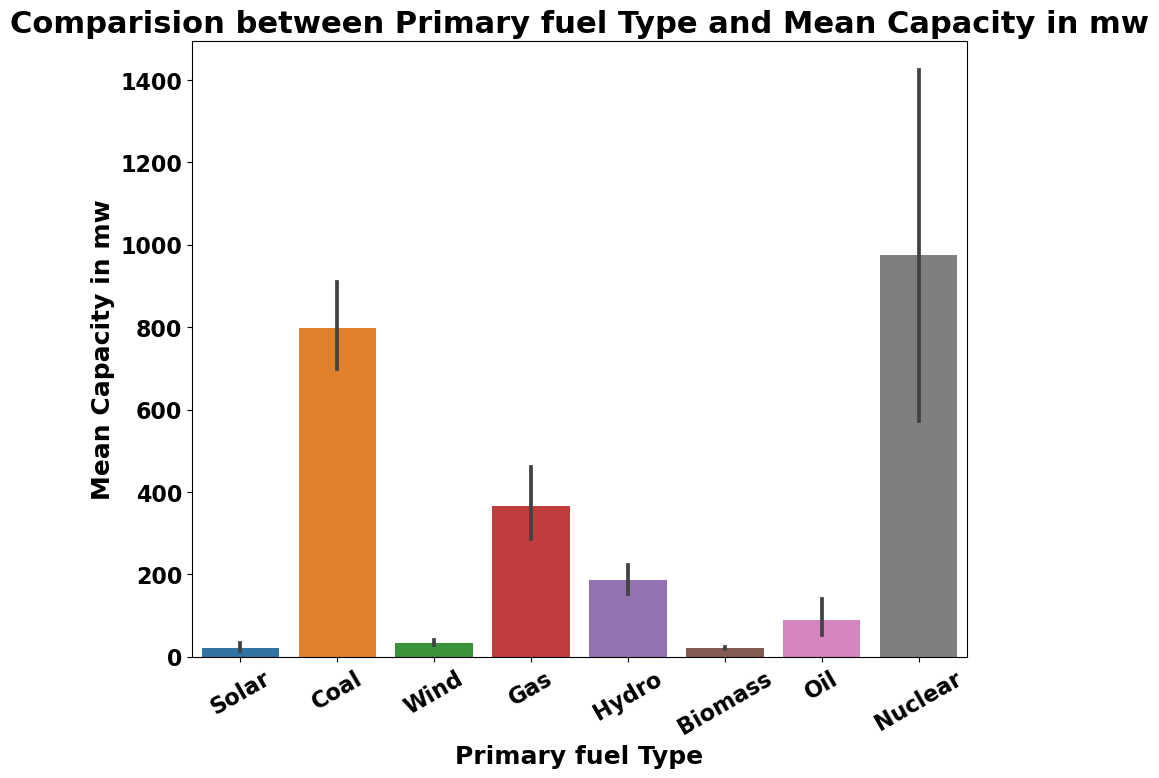

In [26]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

<b> Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.</b>

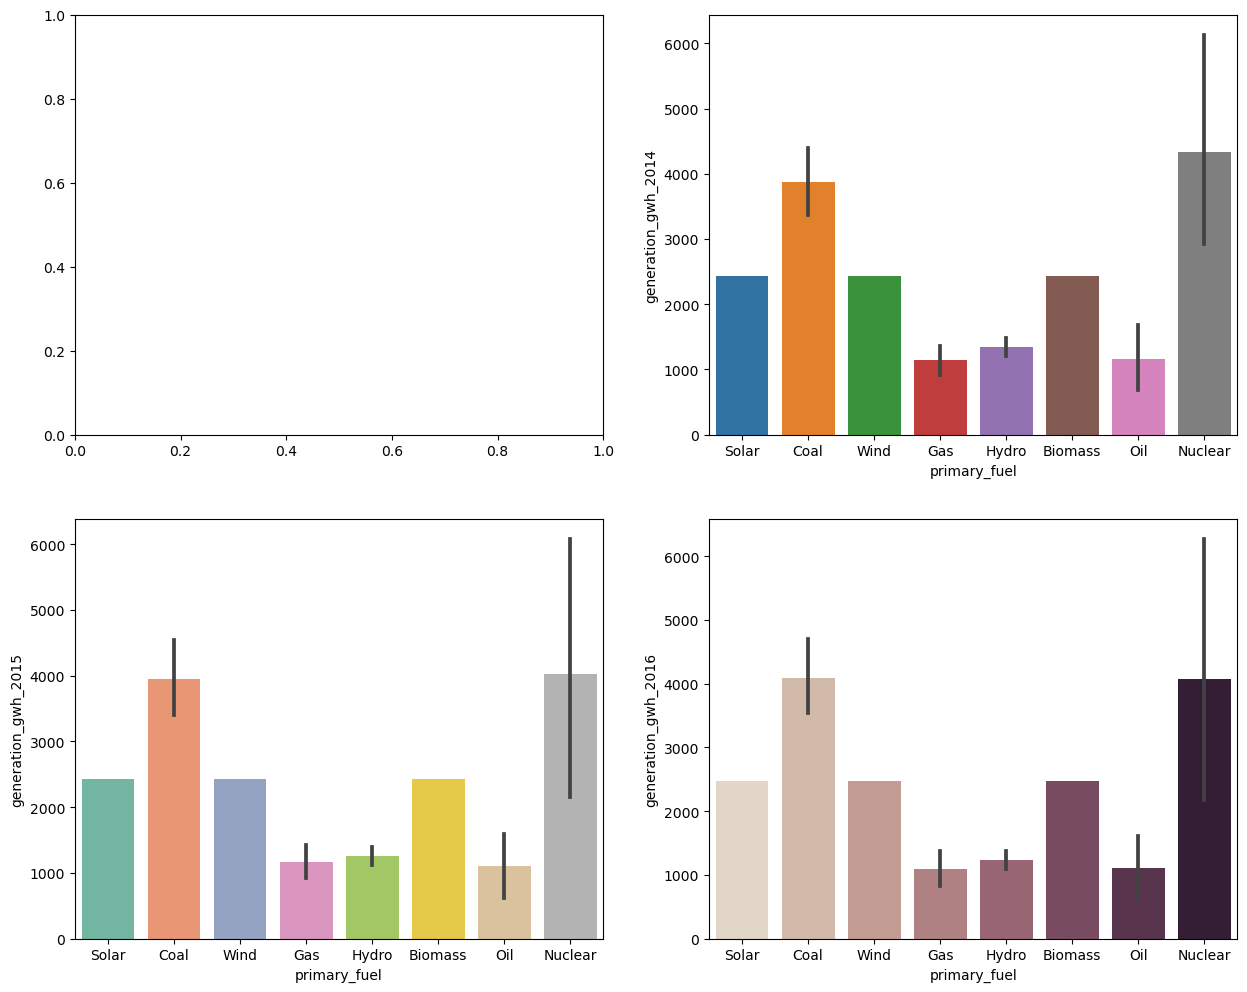

In [27]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

#### Comment:
- From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal.
Reason is high efficieny of Nuclear powerplants.
- Other fuel types have very less contribution to power generation.

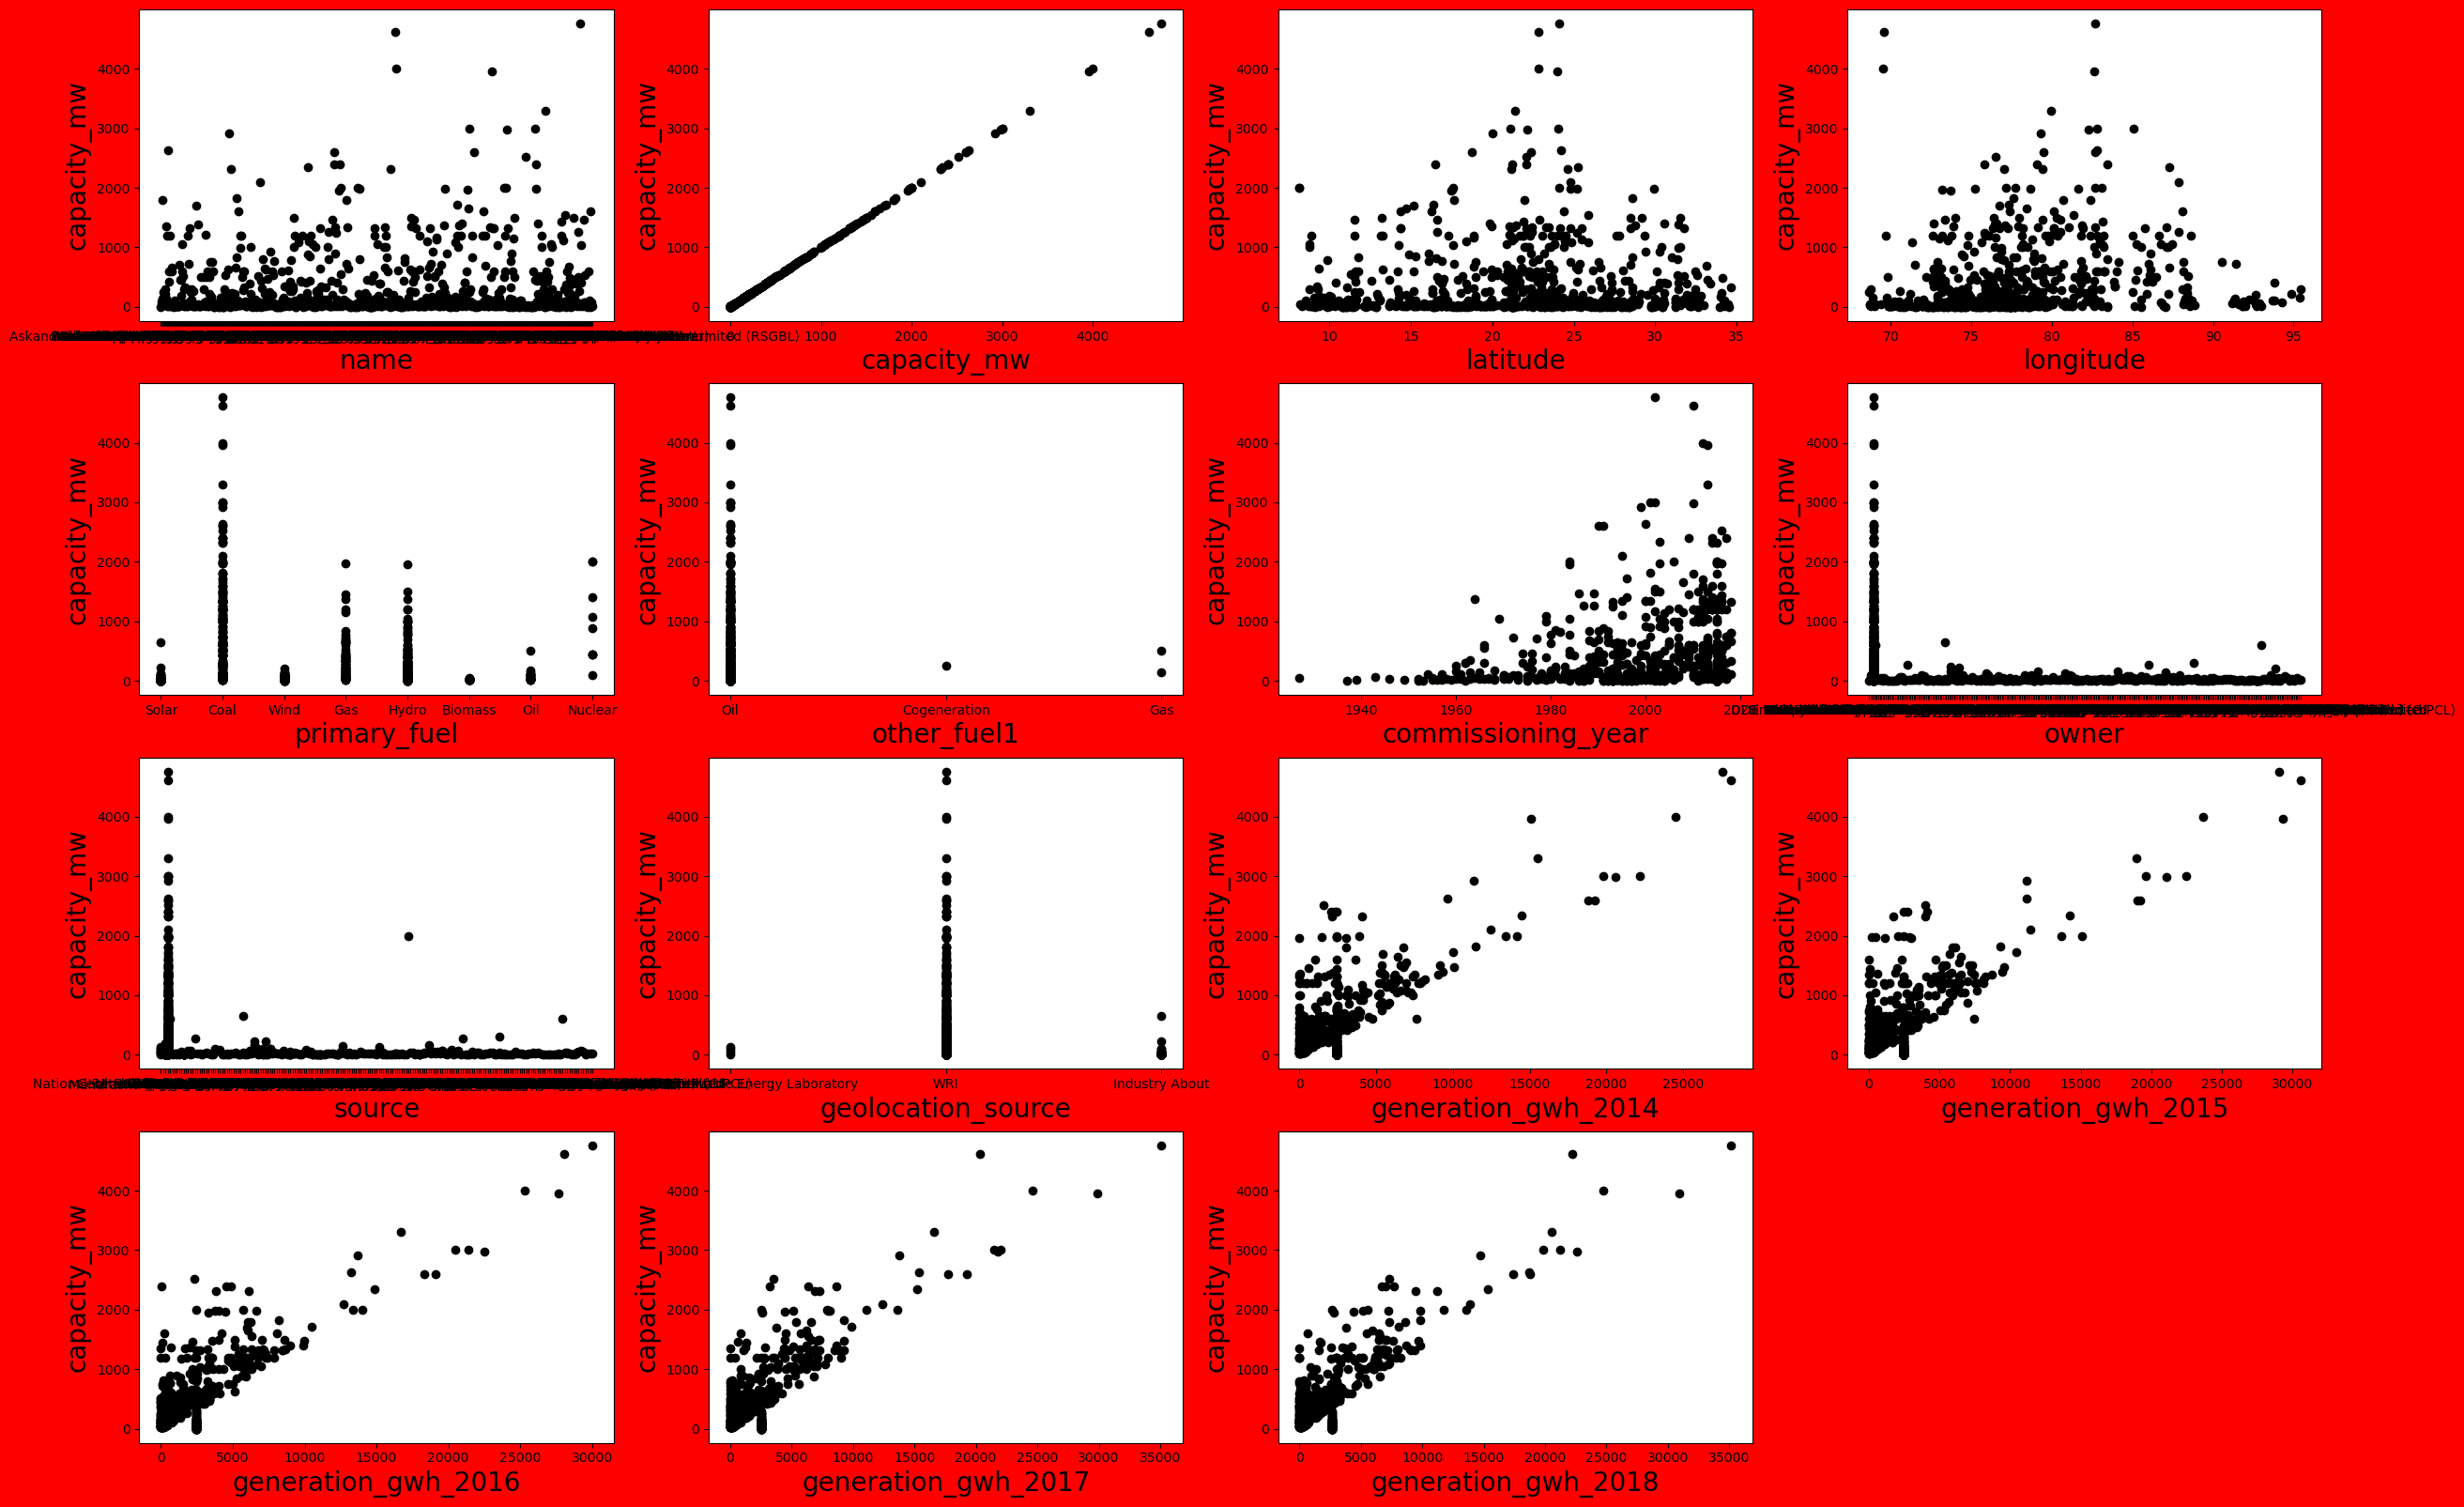

In [28]:
 plt.figure(figsize = (30,25),facecolor = 'red')
pltno = 1
for column in df:
    if pltno <= len(df.columns):
        axs = plt.subplot(5,4,pltno)
        plt.scatter(df[column],df['capacity_mw'],color ='black')
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('capacity_mw',fontsize = 20)
    pltno +=1
plt.show()

- Some Columne HAve Good Correlation With  OutCome

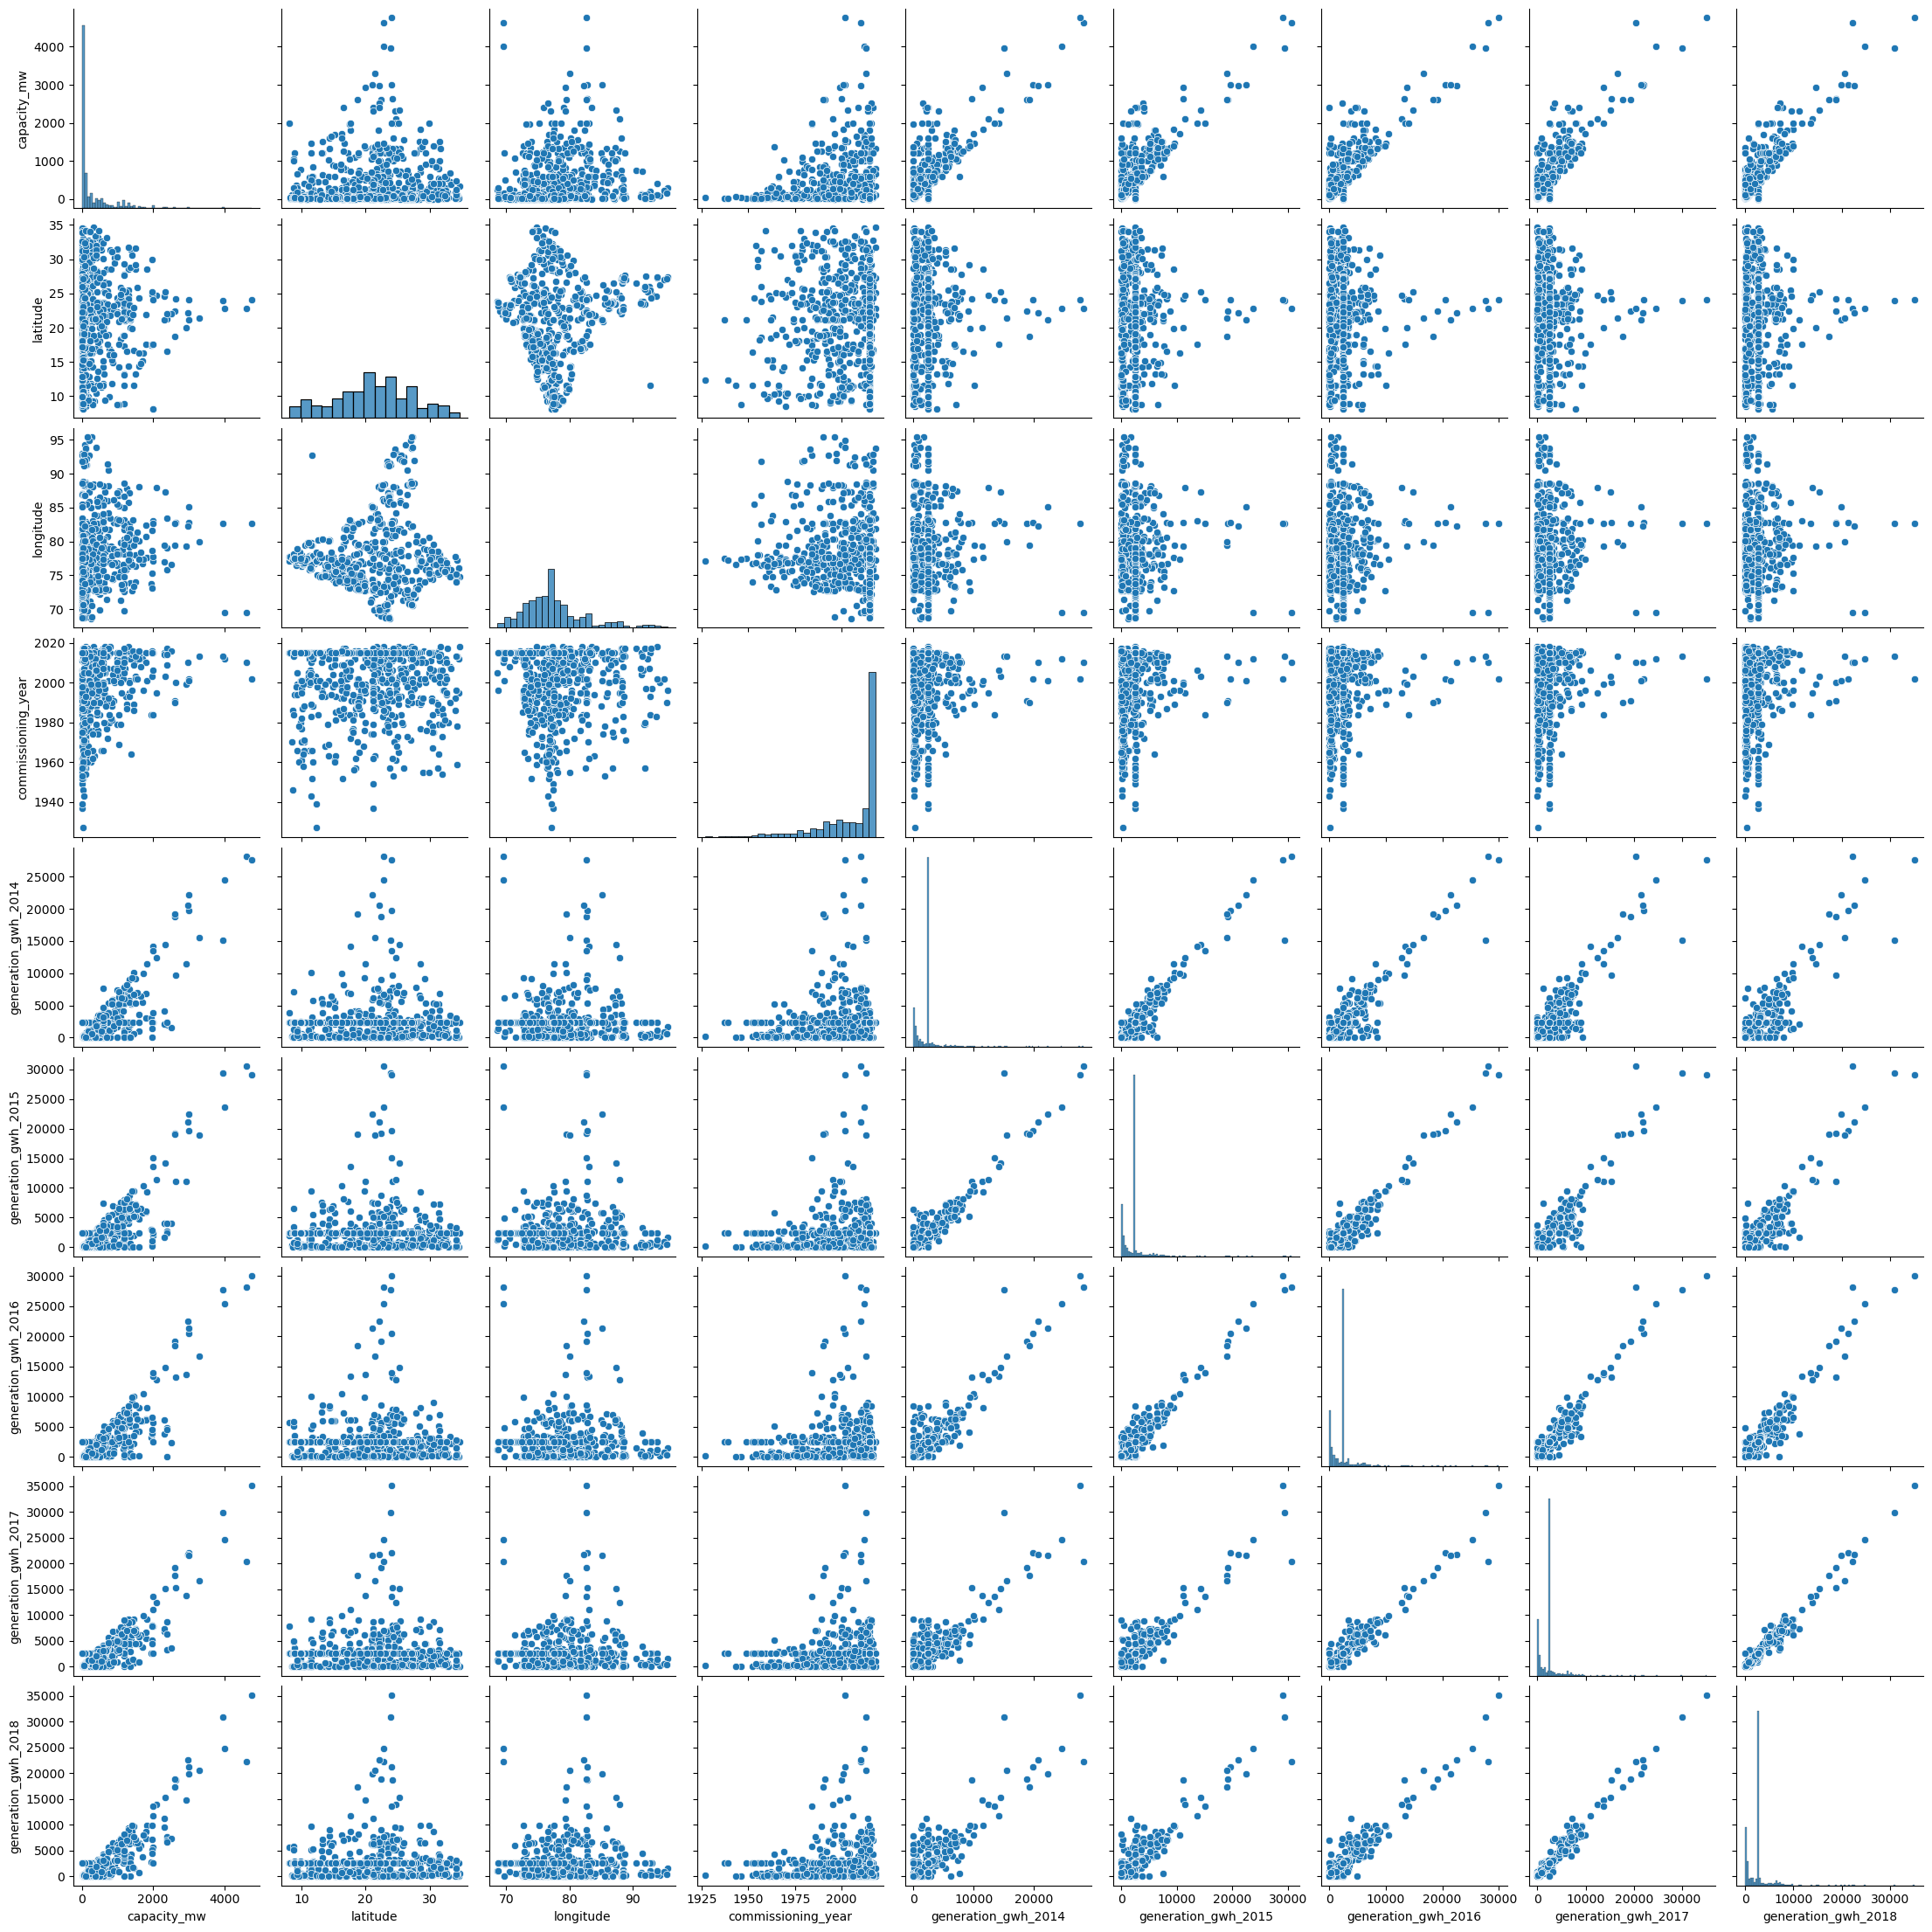

In [29]:
sns.pairplot(df)

####  Comment:
- Most of the features have strong linear relationship and correlation with each other.
- From the plot we can observe the outliers in some of the columns.
- We can see histogram on the diagonal.

### Encoding Categorical Data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             907 non-null    float64
 3   longitude            907 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   907 non-null    float64
 7   owner                907 non-null    object 
 8   source               907 non-null    object 
 9   geolocation_source   907 non-null    object 
 10  generation_gwh_2014  907 non-null    float64
 11  generation_gwh_2015  907 non-null    float64
 12  generation_gwh_2016  907 non-null    float64
 13  generation_gwh_2017  907 non-null    float64
 14  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [31]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype =="object":
        df[i]= le.fit_transform(df[i])

In [32]:
df.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,453.000000,326.223755,21.197918,77.464907,3.206174,1.995590,2004.594267,56.169791,43.847850,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,261.972645,590.085456,6.079148,4.812291,2.280652,0.081259,15.734928,82.529116,44.642818,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.500000,16.725000,17.072000,74.388900,1.000000,2.000000,1998.000000,5.000000,22.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,453.000000,59.200000,21.281800,76.979200,3.000000,2.000000,2014.000000,5.000000,22.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,679.500000,385.250000,25.176450,79.206100,6.000000,2.000000,2015.000000,95.500000,29.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


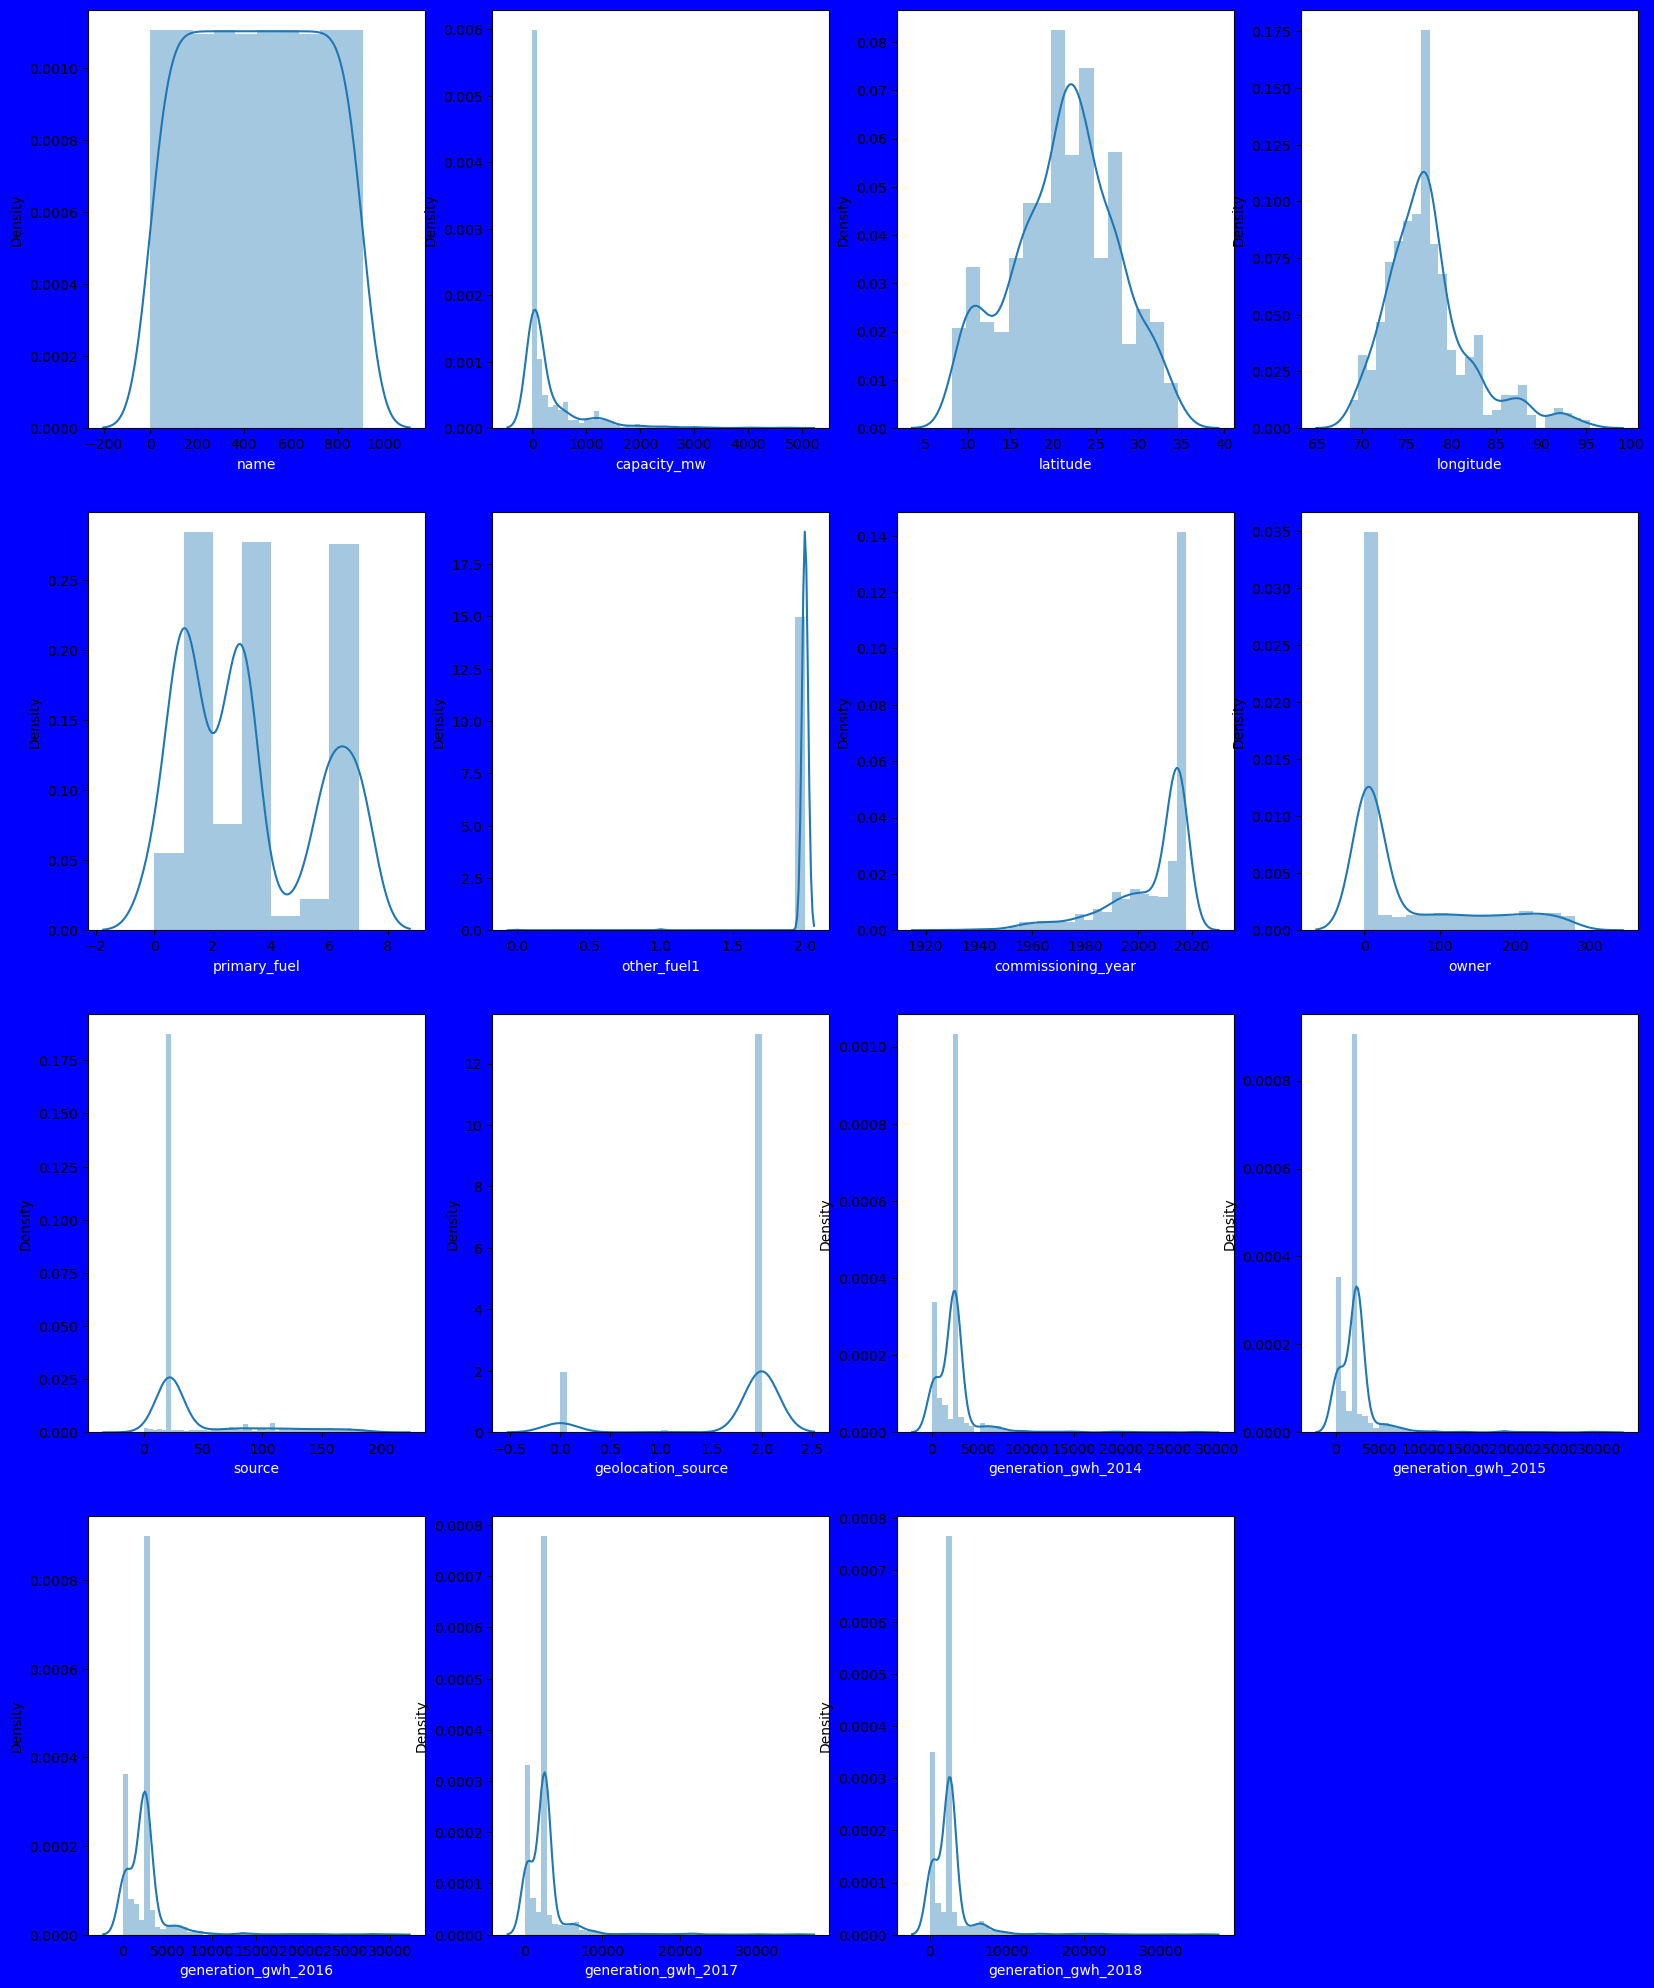

In [33]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

In [34]:
for i in df.columns:
    print(df[i].value_counts())

name
0      1
623    1
597    1
598    1
599    1
      ..
306    1
307    1
308    1
309    1
906    1
Name: count, Length: 907, dtype: int64
capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64
latitude
21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: count, Length: 837, dtype: int64
longitude
77.464907    46
71.691700     4
75.898800     3
71.691800     3
72.898300     3
             ..
70.396100     1
74.239300     1
77.043500     1
73.825400     1
77.476800     1
Name: count, Length: 828, dtype: int64
primary_fuel
1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: count, dtype: int64
other_fuel1
2    904
1      2
0      1
Name: count, dtype: int64
commissioning_year
2015.0    408
2013.

In [35]:
df= df.drop(columns = ['name'])

In [36]:
from scipy.stats import zscore
z_score = zscore(df[["generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]])
abs_z_score = np.abs(z_score)
filtering = (abs_z_score<3).all(axis = 1)
df =df[filtering]
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,275.567355,21.166824,77.397056,3.248315,1.995506,2004.646067,57.147191,44.265169,1.728090,2142.866601,2116.285476,2155.977684,2237.577059,2278.472934
std,450.964605,6.122835,4.785048,2.281663,0.082030,15.839731,83.007675,44.964321,0.682579,1484.454825,1524.834487,1589.844221,1655.691336,1742.346328
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,16.932025,74.381075,1.000000,2.000000,1998.000000,5.000000,22.000000,2.000000,1153.714058,850.360250,814.473338,832.618825,700.840688
50%,51.000000,21.235350,76.877650,3.000000,2.000000,2015.000000,5.000000,22.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,318.750000,25.202150,79.115325,6.000000,2.000000,2015.000000,99.750000,33.750000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,2520.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,10063.180000,10422.690000,10503.882000,9833.690000,11179.550000


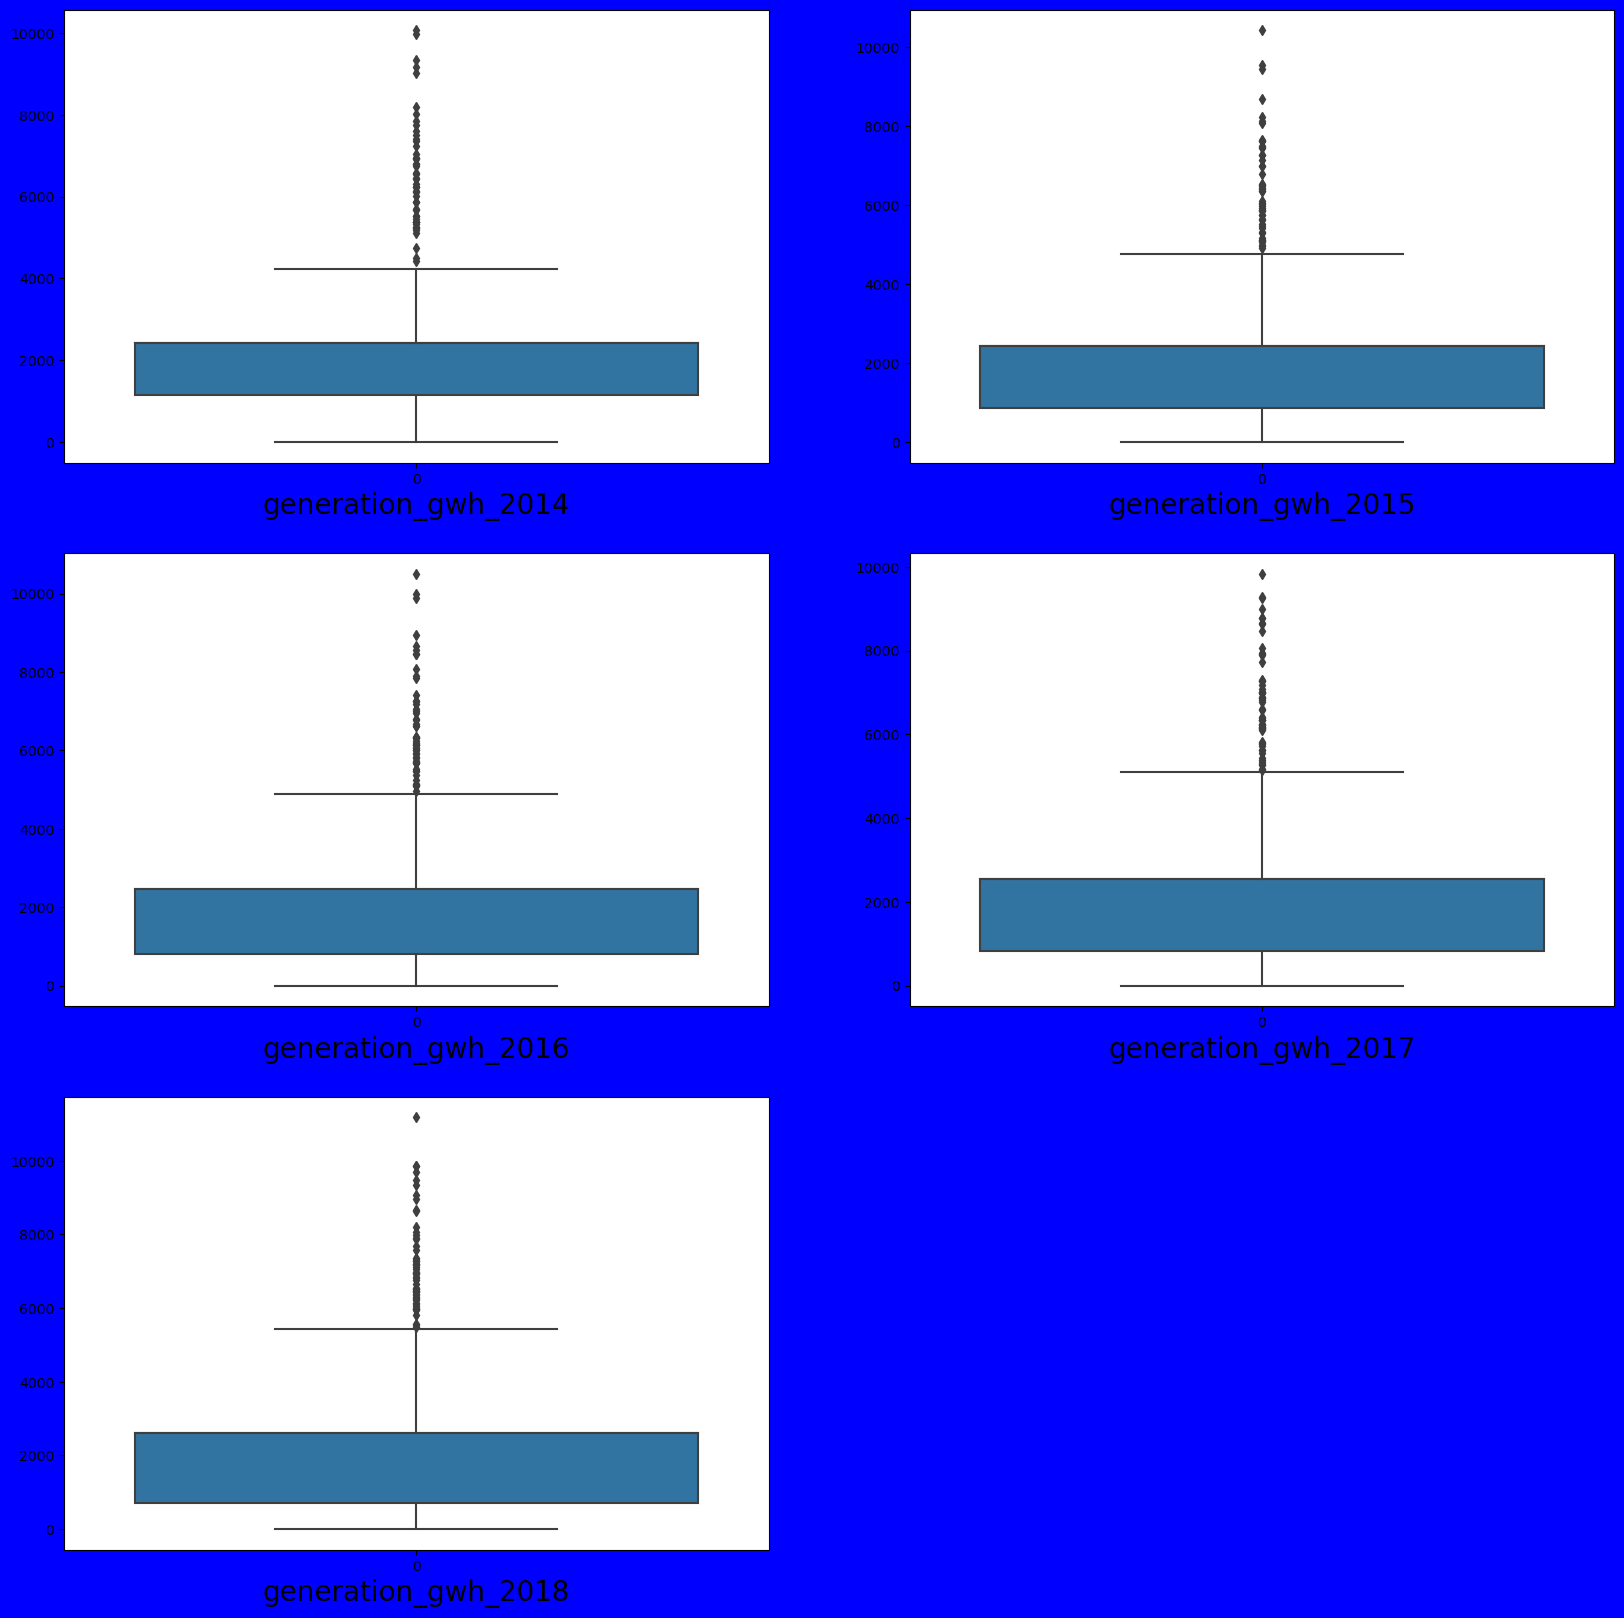

In [37]:
plt.figure(figsize = (20,20),facecolor = "blue")
plotnumber = 1
for column in df[['generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018']]:
    if plotnumber<= len(column):
        axs = plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

In [38]:
#Using Boxcox Method  for remove Skewness
from scipy.stats import boxcox
for i in 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018':
    if df.dtypes[i] == "float":
        trnsfrm_data, _ = boxcox(df[i]+1)
        df[i] =trnsfrm_data   

In [39]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,275.567355,21.166824,77.397056,3.248315,1.995506,2004.646067,57.147191,44.265169,1.728090,114.034284,99.264258,91.357711,90.010914,79.945873
std,450.964605,6.122835,4.785048,2.281663,0.082030,15.839731,83.007675,44.964321,0.682579,52.154369,47.192777,43.682529,43.132643,38.303471
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,16.932025,74.381075,1.000000,2.000000,1998.000000,5.000000,22.000000,2.000000,87.198021,66.219960,60.034385,59.100877,48.838101
50%,51.000000,21.235350,76.877650,3.000000,2.000000,2015.000000,5.000000,22.000000,2.000000,132.529127,117.095019,107.968121,106.213886,94.773777
75%,318.750000,25.202150,79.115325,6.000000,2.000000,2015.000000,99.750000,33.750000,2.000000,132.529127,117.095019,107.968121,106.213886,94.773777
max,2520.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,292.525865,256.373149,230.487343,213.918708,196.044502


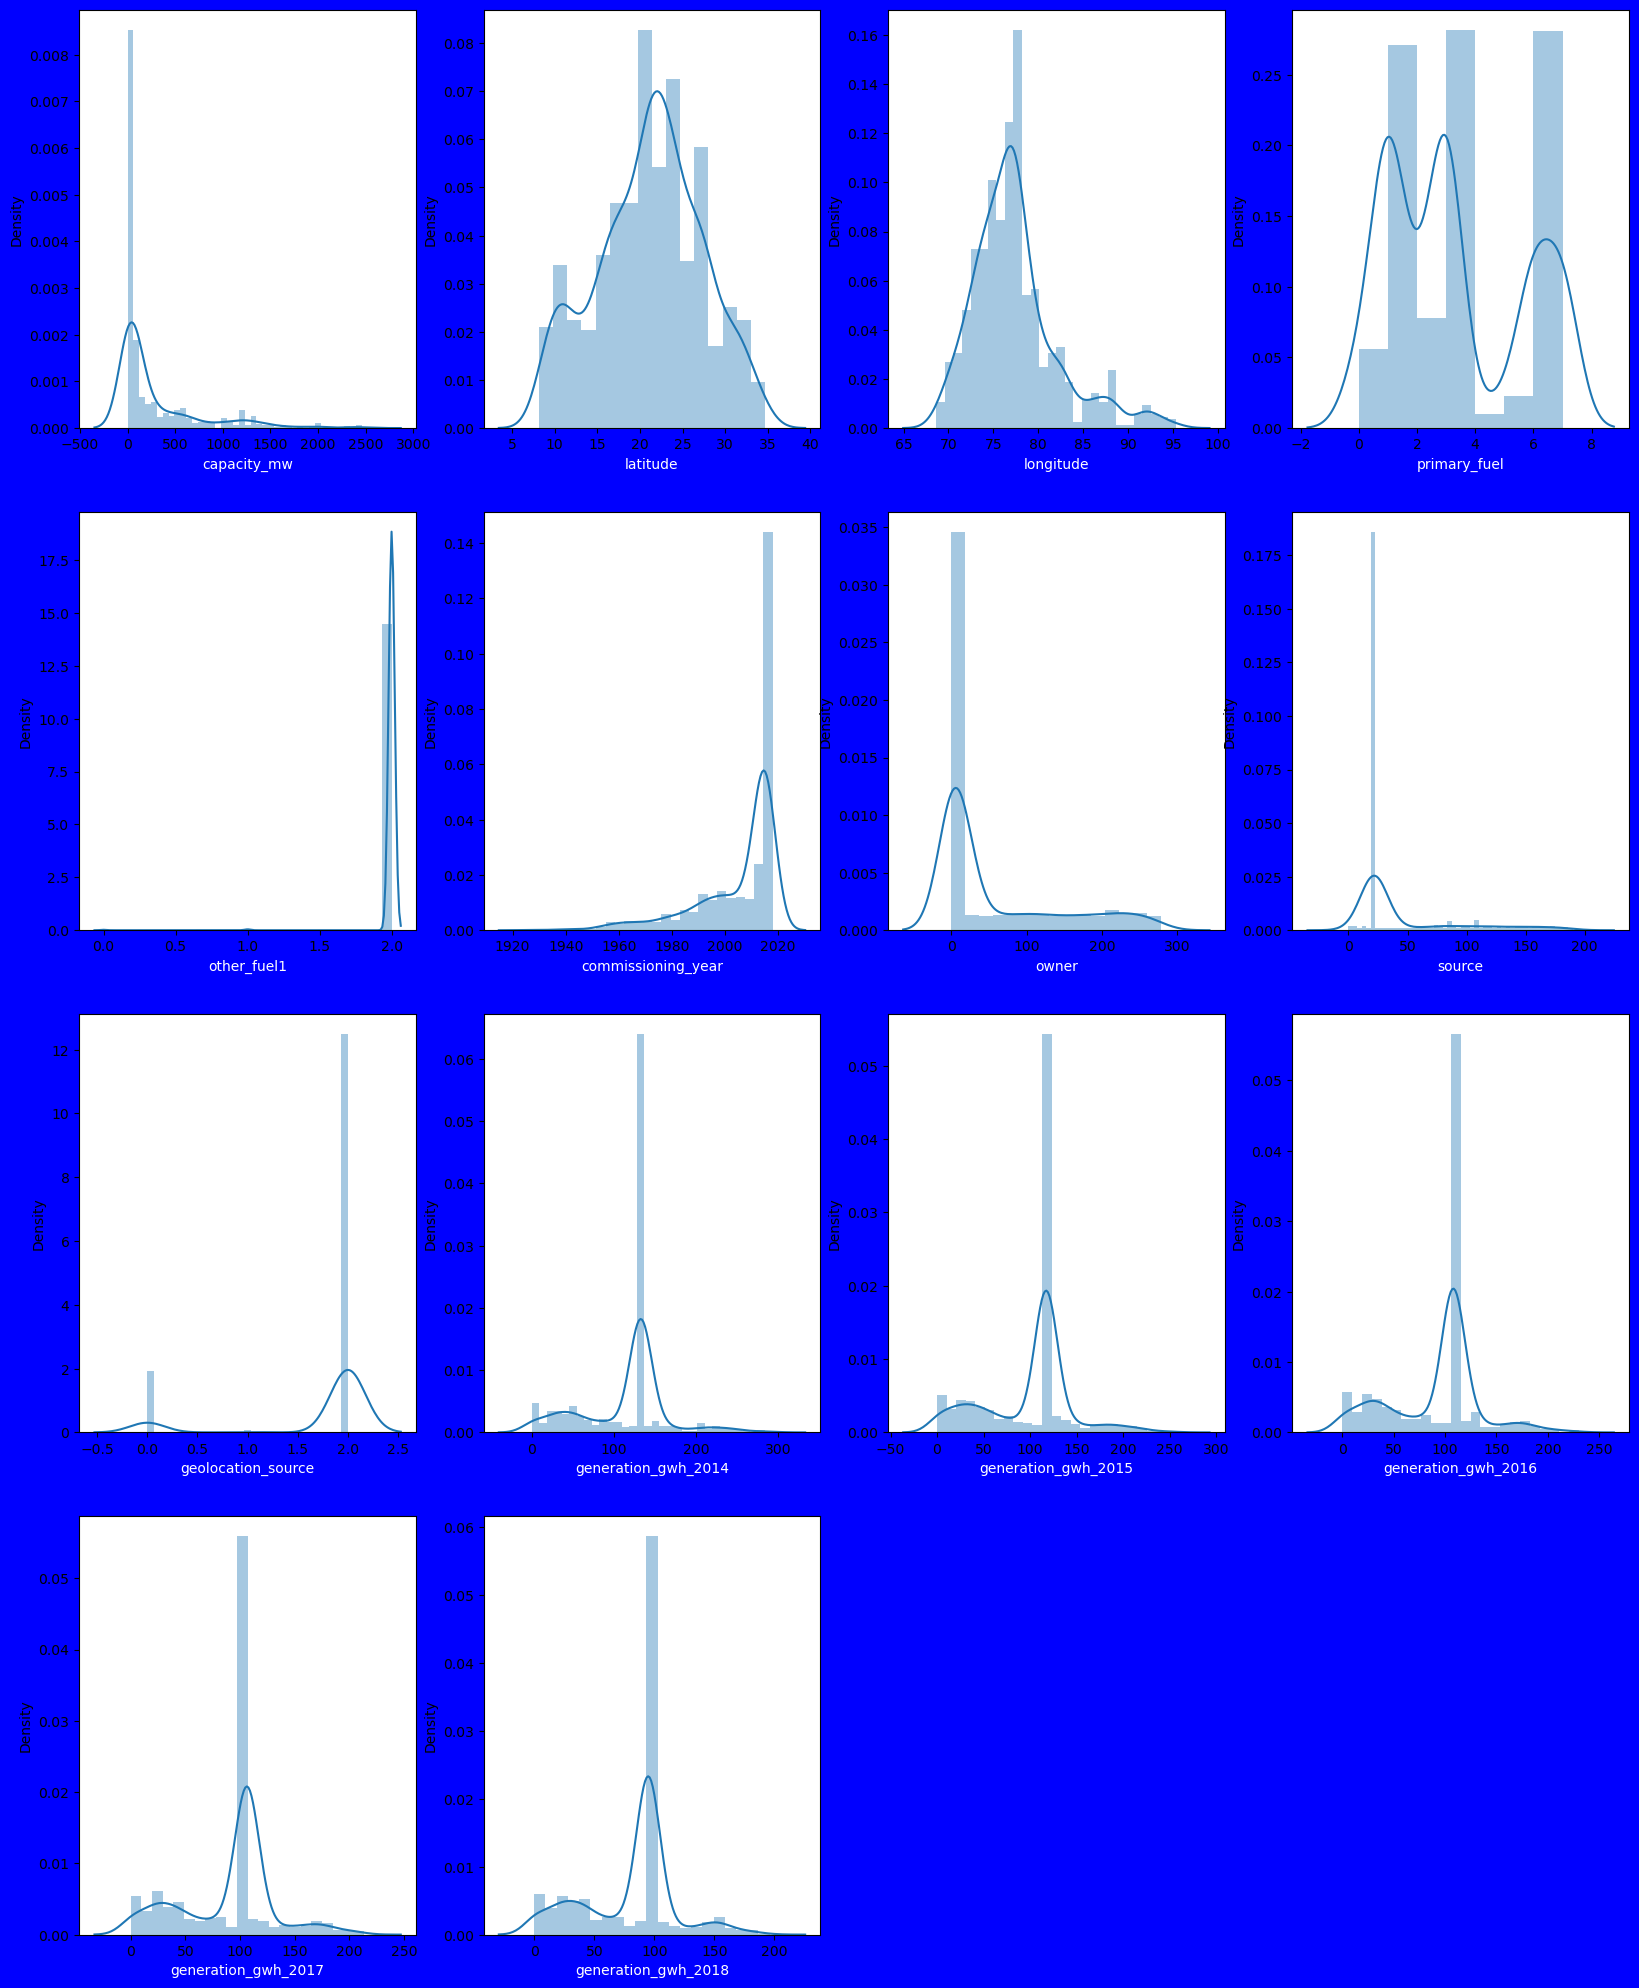

In [40]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

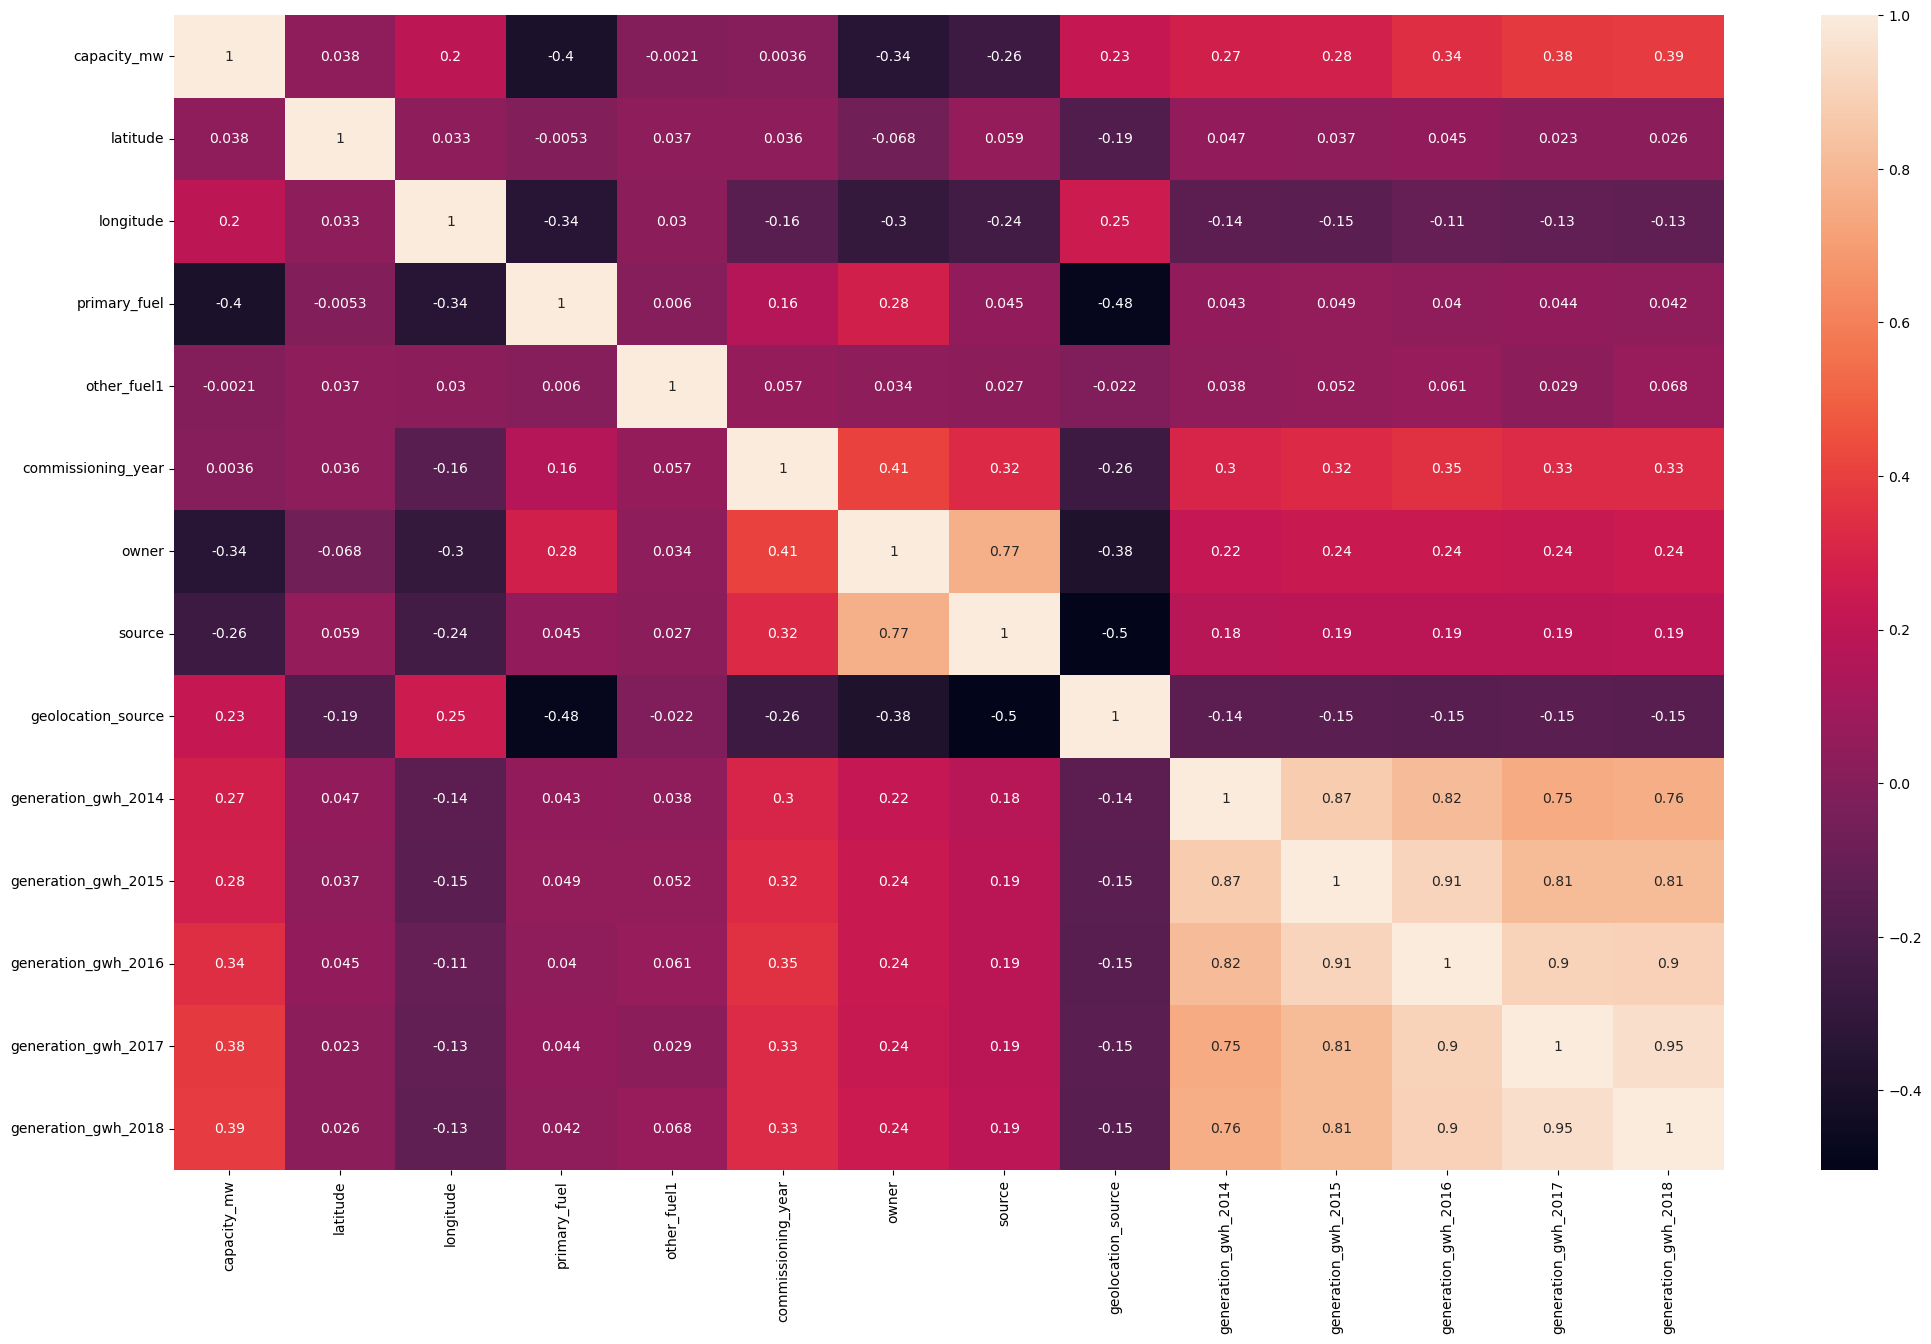

In [41]:
#Checking relationship Between Feature To Outcom And Feature To Feature
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,annot = True , annot_kws ={"size": 10})
plt.show()

In [42]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [43]:
#For Regression Model
reg_X  = df.drop(columns = "capacity_mw").copy()
reg_y = df["capacity_mw"].copy()

In [126]:
#Classification Model
cls_X = df.drop(columns = "primary_fuel").copy()
cls_y = df['primary_fuel'].copy()

In [45]:
#Standardizing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
reg_X = pd.DataFrame(scaler.fit_transform(reg_X),columns =reg_X.columns)

In [46]:
#Checking Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":reg_X.columns,"vif":[variance_inflation_factor(reg_X,i) for i in range(reg_X.shape[1])]})

In [47]:
vif

,Features,vif
0,latitude,1.084369
1,longitude,1.233504
2,primary_fuel,1.897340
3,other_fuel1,1.025269
4,commissioning_year,1.329747
5,owner,3.390540
6,source,3.783259
7,geolocation_source,2.111495
8,generation_gwh_2014,4.303596
9,generation_gwh_2015,8.005995


In [48]:
reg_X = reg_X.drop(columns = 'generation_gwh_2015')
reg_X = reg_X.drop(columns = 'generation_gwh_2017')
reg_X = reg_X.drop(columns = 'generation_gwh_2016')
reg_X = reg_X.drop(columns = 'generation_gwh_2018')


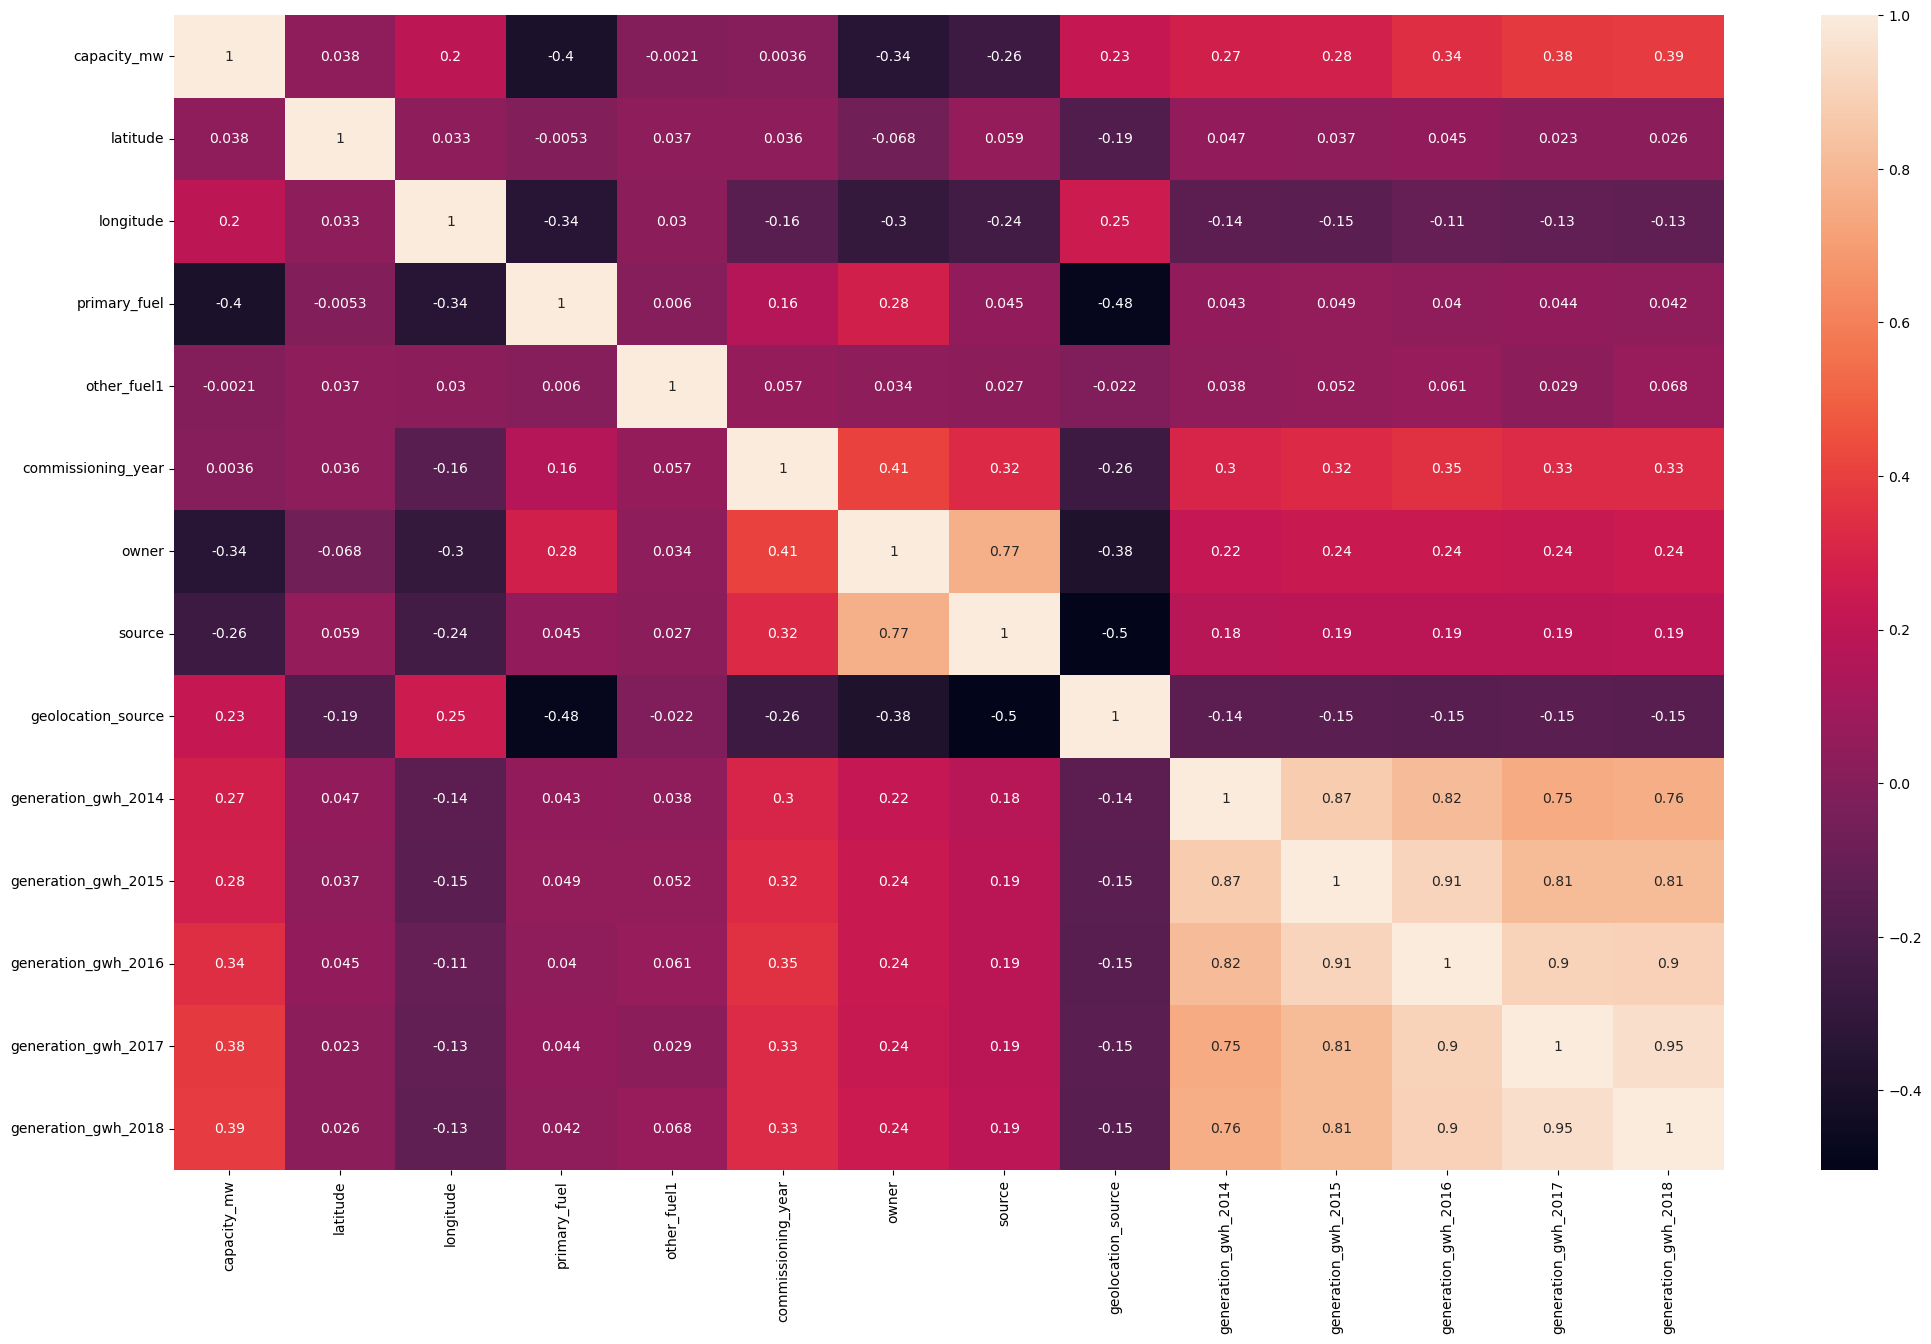

In [49]:
#Checking relationship Between Feature To Outcom And Feature To Feature
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,annot = True , annot_kws ={"size": 10})
plt.show()

In [50]:
#Checking Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":reg_X.columns,"vif":[variance_inflation_factor(reg_X,i) for i in range(reg_X.shape[1])]})

In [51]:
vif


,Features,vif
0,latitude,1.082130
1,longitude,1.219260
2,primary_fuel,1.892769
3,other_fuel1,1.007136
4,commissioning_year,1.295141
5,owner,3.379944
6,source,3.780287
7,geolocation_source,2.107035
8,generation_gwh_2014,1.134214


## Regression Model

In [52]:
#Importing Necessory Liabraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [53]:
#Finding The Best Random State
max_accuracy = 0
best_rm = 0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(reg_X,reg_y, test_size = 30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum R Square Score :-",max_accuracy,"in This Random State",best_rm)


Maximum R Square Score :- 0.7477103497109674 in This Random State 443


In [54]:
x_train,x_test,y_train,y_test = train_test_split(reg_X,reg_y,test_size = 30,random_state = best_rm)

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred =lr.predict(x_test)
train_pred =lr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,lr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,lr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,lr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,lr_pred)*100))



Training Data- R Square Score 34.889464603419995
R Square Score:- 74.77103497109674
Mean Absolute Error:- 15318.487834010526
Mean Squared Error:- 4436327.264948346
Root Mean Squared Error:- 2106.259068810944


In [57]:
score = cross_val_score(lr,x_train,y_train,cv = 5, scoring = "r2")
print(score)
print(score.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,lr_pred) - score.mean()))

[0.26195171 0.35091201 0.25759131 0.36694541 0.39828731]
32.71375506407054
Difference Between R Square Score And Cross Validation Score Is:- 0.420572799070262


In [58]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN()
knn.fit(x_train,y_train)
knn_pred =knn.predict(x_test)
train_pred =knn.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,knn_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,knn_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,knn_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,knn_pred)*100))


Training Data- R Square Score 67.45218267844541
R Square Score:- 81.01154680245256
Mean Absolute Error:- 7831.566666666666
Mean Squared Error:- 3338979.3256666665
Root Mean Squared Error:- 1827.2874228392934


In [59]:
score1 = cross_val_score(knn,x_train,y_train,cv = 5, scoring = "r2")
print(score1)
print(score1.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,knn_pred) - score1.mean()))

[0.38524517 0.43349631 0.32073016 0.56349092 0.5085594 ]
44.230439157508634
Difference Between R Square Score And Cross Validation Score Is:- 0.3678110764494393


In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred =dtr.predict(x_test)
train_pred =dtr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,dtr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,dtr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,dtr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,dtr_pred)*100))

Training Data- R Square Score 99.99633154772573
R Square Score:- 92.86459351415188
Mean Absolute Error:- 6823.5
Mean Squared Error:- 1254708.558333333
Root Mean Squared Error:- 1120.1377407860755


In [61]:
score2 = cross_val_score(dtr,x_train,y_train,cv = 5, scoring = "r2")
print(score2)
print(score2.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,dtr_pred) - score2.mean()))

[0.11629643 0.10103463 0.46068021 0.39806631 0.48313616]
31.1842749115862
Difference Between R Square Score And Cross Validation Score Is:- 0.6168031860256569


In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred =rfr.predict(x_test)
train_pred =rfr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,rfr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,rfr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,rfr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,rfr_pred)*100))

Training Data- R Square Score 95.46986514938524
R Square Score:- 94.91598882601474
Mean Absolute Error:- 5545.092938888888
Mean Squared Error:- 893985.8357492569
Root Mean Squared Error:- 945.5082420313727


In [63]:
score3 = cross_val_score(rfr,x_train,y_train,cv = 5, scoring = "r2")
print(score3)
print(score3.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,rfr_pred) - score3.mean()))

[0.6163519  0.63560099 0.58072533 0.73520604 0.64201393]
64.19796377758009
Difference Between R Square Score And Cross Validation Score Is:- 0.3071802504843465


In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred =gbr.predict(x_test)
train_pred =gbr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,gbr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,gbr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,gbr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,gbr_pred)*100))

Training Data- R Square Score 85.00520748356189
R Square Score:- 83.30279304230385
Mean Absolute Error:- 7331.923599228112
Mean Squared Error:- 2936080.587929405
Root Mean Squared Error:- 1713.4995150070527


In [65]:
score4 = cross_val_score(gbr,x_train,y_train,cv = 5, scoring = "r2")
print(score4)
print(score4.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,gbr_pred) - score4.mean()))

[0.61260347 0.64970196 0.57823153 0.73941401 0.65233334]
64.64568619415697
Difference Between R Square Score And Cross Validation Score Is:- 0.18657106848146887


In [66]:
from sklearn.linear_model import Lasso
lso = Lasso()
lso.fit(x_train,y_train)
lso_pred =lso.predict(x_test)
train_pred =lso.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,lso_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,lso_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,lso_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,lso_pred)*100))

Training Data- R Square Score 34.8828182053595
R Square Score:- 74.69031186712284
Mean Absolute Error:- 15319.461138013847
Mean Squared Error:- 4450521.826899672
Root Mean Squared Error:- 2109.625992184319


In [67]:
score5 = cross_val_score(lso,x_train,y_train,cv = 5, scoring = "r2")
print(score5)
print(score5.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,lso_pred) - score5.mean()))

[0.26343343 0.35342656 0.26091012 0.36735735 0.39772583]
32.85706559550598
Difference Between R Square Score And Cross Validation Score Is:- 0.4183324627161687


In [68]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(x_train,y_train)
rdg_pred =rdg.predict(x_test)
train_pred =rdg.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,rdg_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,rdg_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,rdg_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,rdg_pred)*100))

Training Data- R Square Score 34.889382743250195
R Square Score:- 74.73919797260115
Mean Absolute Error:- 15328.405433049098
Mean Squared Error:- 4441925.566119175
Root Mean Squared Error:- 2107.587617661286


In [69]:
score6 = cross_val_score(rdg,x_train,y_train,cv = 5, scoring = "r2")
print(score6)
print(score6.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,rdg_pred) - score6.mean()))

[0.26219357 0.35118487 0.2578347  0.36692009 0.39812226]
32.72510981744296
Difference Between R Square Score And Cross Validation Score Is:- 0.4201408815515818


In [70]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_pred =svr.predict(x_test)
train_pred =svr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,svr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,svr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,svr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,svr_pred)*100))

Training Data- R Square Score -14.191909928827906
R Square Score:- -11.331097060358509
Mean Absolute Error:- 21725.6284995475
Mean Squared Error:- 19576751.593244
Root Mean Squared Error:- 4424.562305273144


In [71]:
score7 = cross_val_score(svr,x_train,y_train,cv = 5, scoring = "r2")
print(score7)
print(score7.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,svr_pred) - score7.mean()))

[-0.13826832 -0.17607277 -0.1643141  -0.12821623 -0.20885858]
-16.3145999509711
Difference Between R Square Score And Cross Validation Score Is:- 0.04983502890612593


In [72]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred =etr.predict(x_test)
train_pred =etr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,etr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,etr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,etr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,etr_pred)*100))

Training Data- R Square Score 99.99633154772573
R Square Score:- 94.72573727042875
Mean Absolute Error:- 5983.979333333334
Mean Squared Error:- 927440.1673985331
Root Mean Squared Error:- 963.0369501730103


In [73]:
score8 = cross_val_score(etr,x_train,y_train,cv = 5, scoring = "r2")
print(score8)
print(score8.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,etr_pred) - score8.mean()))

[0.69630692 0.62538077 0.5994267  0.71555817 0.6389996 ]
65.51344321711274
Difference Between R Square Score And Cross Validation Score Is:- 0.29212294053316024


- Best Model Is ExtraTreesClassifier

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {'criterion':['absolute_error','squared_error'],
            'n_estimators':[50,100,200],
             'max_depth':[None,10,20],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[2,4],
             'bootstrap':[True,False]}

In [76]:
grid_search = GridSearchCV(estimator = etr,param_grid =param_grid,scoring ='r2', cv =5)

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [81]:
best_param = grid_search.best_params_

In [80]:
Regression_Model = ExtraTreesRegressor(criterion = 'squared_error',max_depth = 50,n_estimators = 300,min_samples_split=10,min_samples_leaf = 10)
Regression_Model.fit(x_train,y_train)
Reg_pred = Regression_Model.predict(x_test)
R2_Score = r2_score(y_test,Reg_pred)
print(R2_Score*100)


89.91037288944986


In [82]:
import joblib
joblib.dump(Regression_Model,"Power Plant Model.pkl")

['Power Plant Model.pkl']

## Classification

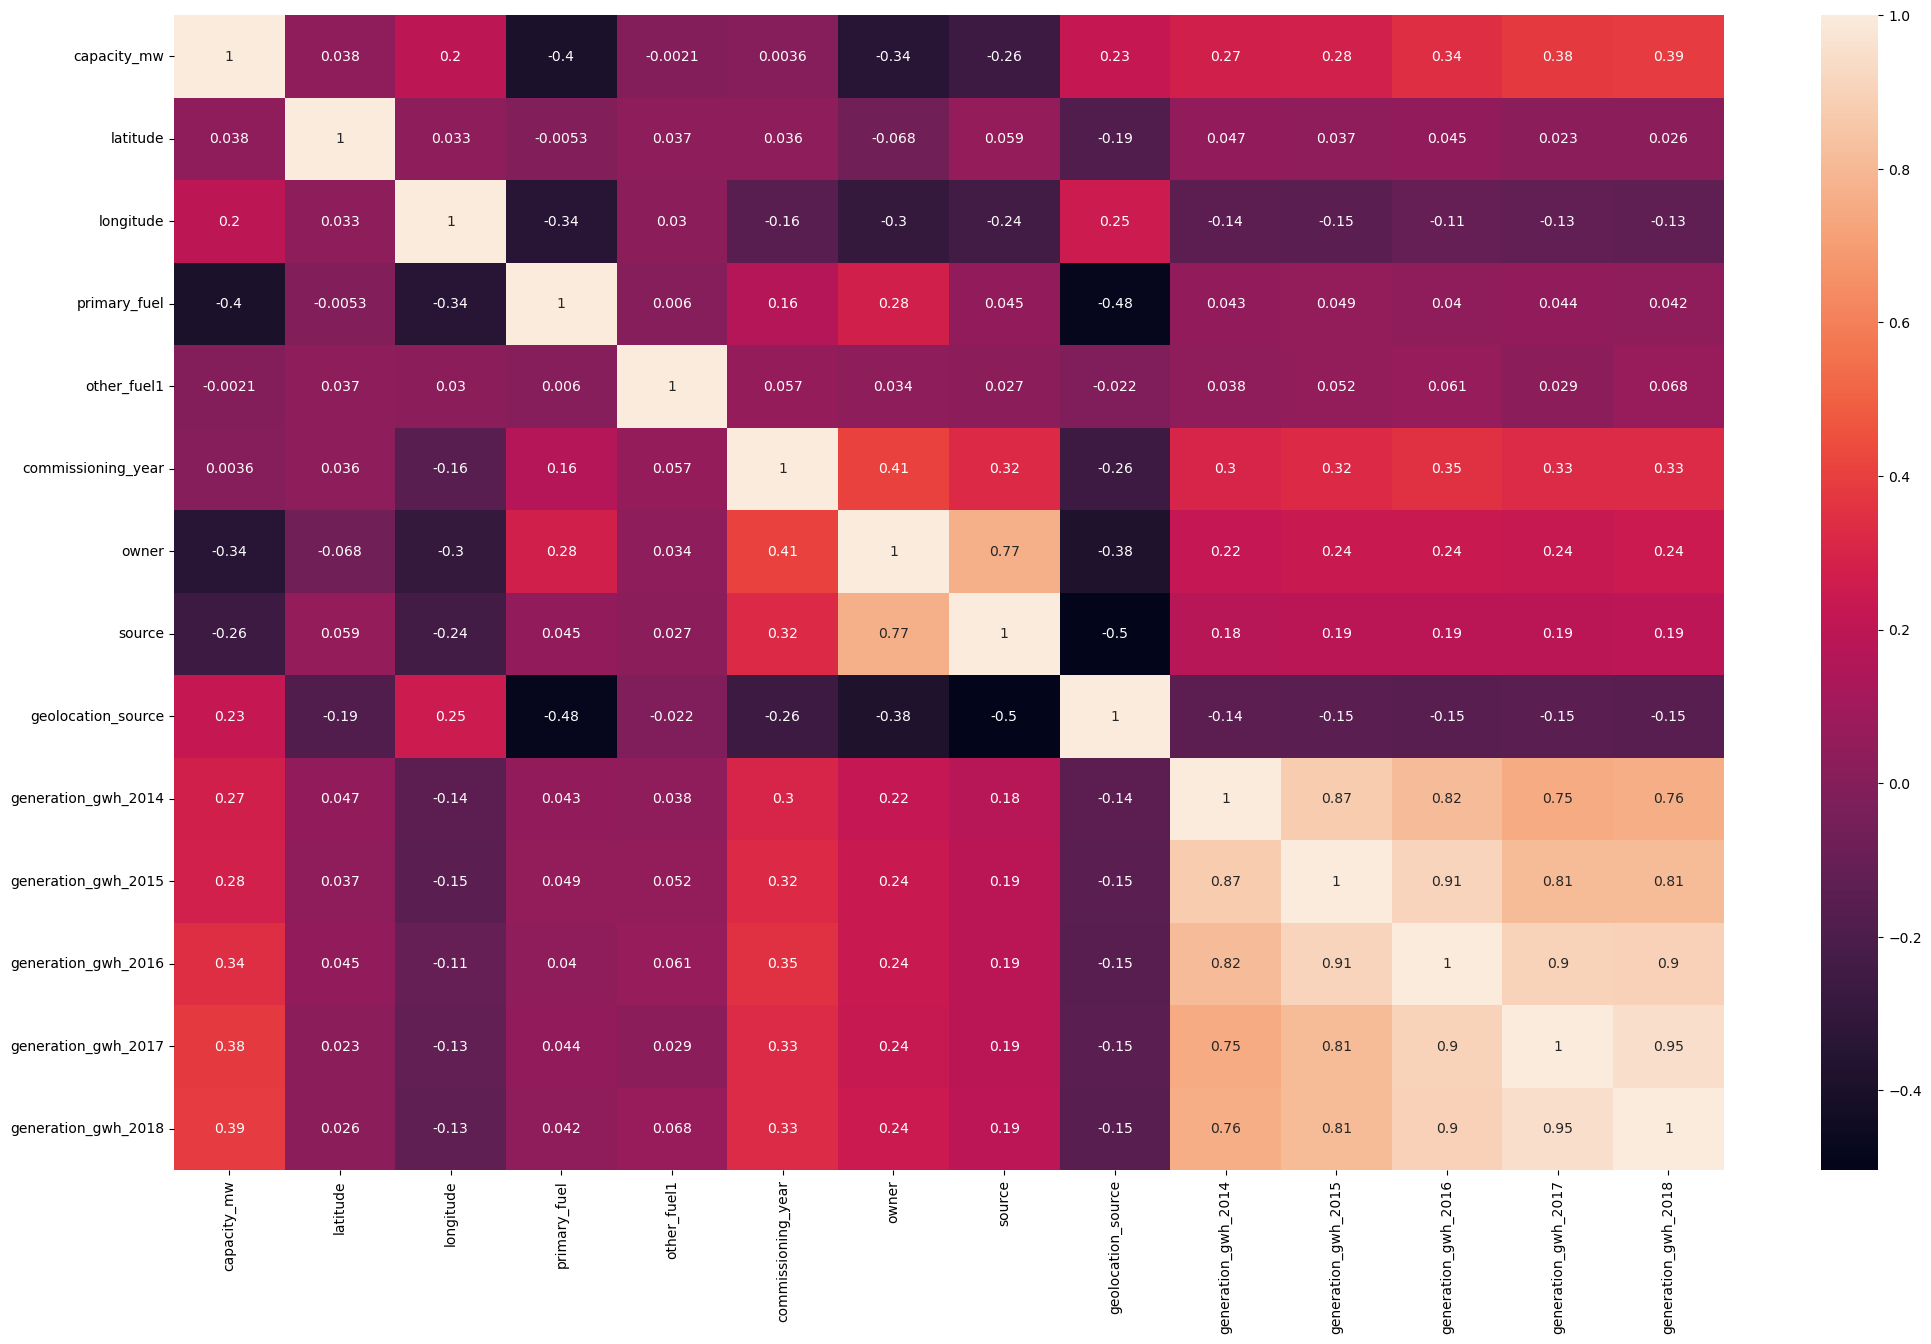

In [127]:
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,annot = True , annot_kws ={"size": 10})
plt.show()

In [128]:
cls_X = pd.DataFrame(scaler.fit_transform(cls_X),columns =cls_X.columns)

In [129]:
cls_vif= pd.DataFrame({"Features":cls_X.columns,"vif":[variance_inflation_factor(cls_X,i) for i in range(cls_X.shape[1])]})
cls_vif

,Features,vif
0,capacity_mw,1.634219
1,latitude,1.083246
2,longitude,1.172772
3,other_fuel1,1.025941
4,commissioning_year,1.334629
5,owner,3.143340
6,source,2.839937
7,geolocation_source,1.485906
8,generation_gwh_2014,4.303635
9,generation_gwh_2015,8.014970


In [130]:
cls_X = cls_X.drop(columns = 'generation_gwh_2015')
cls_X = cls_X.drop(columns = 'generation_gwh_2016')
cls_X = cls_X.drop(columns = 'generation_gwh_2017')
cls_X = cls_X.drop(columns = 'generation_gwh_2018')

In [131]:
cls_X = cls_X.drop(columns = 'generation_gwh_2014')

In [132]:
cls_vif= pd.DataFrame({"Features":cls_X.columns,"vif":[variance_inflation_factor(cls_X,i) for i in range(cls_X.shape[1])]})
cls_vif

,Features,vif
0,capacity_mw,1.199756
1,latitude,1.079183
2,longitude,1.141909
3,other_fuel1,1.006639
4,commissioning_year,1.270735
5,owner,2.983121
6,source,2.836547
7,geolocation_source,1.468983


In [133]:
cls_y.value_counts()

primary_fuel
3    251
1    241
6    127
7    123
2     69
0     50
5     20
4      9
Name: count, dtype: int64

In [134]:
from imblearn.over_sampling import SMOTE
sm =SMOTE()
cls_X,cls_y = sm.fit_resample(cls_X,cls_y)
cls_y.value_counts()

primary_fuel
6    251
1    251
7    251
2    251
3    251
0    251
5    251
4    251
Name: count, dtype: int64

In [135]:
cls_vif= pd.DataFrame({"Features":cls_X.columns,"vif":[variance_inflation_factor(cls_X,i) for i in range(cls_X.shape[1])]})
cls_vif

,Features,vif
0,capacity_mw,1.231090
1,latitude,1.121886
2,longitude,1.129737
3,other_fuel1,1.038244
4,commissioning_year,1.418540
5,owner,3.736021
6,source,3.192143
7,geolocation_source,1.335385


In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#Finding The Best Random State
max_accuracy = 0
best_rm = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(cls_X,cls_y, test_size = 30,random_state = i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum R Square Score :-",max_accuracy,"in This Random State",best_rm)



Maximum R Square Score :- 1.0 in This Random State 55


In [137]:
from sklearn.metrics import confusion_matrix,roc_curve,classification_report
x_train,x_test,y_train,y_test = train_test_split(cls_X,cls_y, test_size = 30,random_state = best_rm)

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
lgr_pred = lgr.predict(x_test)
print(accuracy_score(y_test,lgr_pred))
print(confusion_matrix(y_test,lgr_pred))
print(classification_report(y_test,lgr_pred))

0.7333333333333333
[[3 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [2 0 0 1 0 0 0 0]
 [1 0 0 3 0 0 0 0]
 [0 0 0 1 5 0 0 0]
 [1 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         3
           3       0.60      0.75      0.67         4
           4       1.00      0.83      0.91         6
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           0.73        30
   macro avg       0.75      0.72      0.69        30
weighted avg       0.78      0.73      0.72        30



In [140]:
score = cross_val_score(lgr,x_train,y_train,cv = 5)
print(score)
print(score.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,lgr_pred) - score.mean()))

[0.6969697  0.66919192 0.66161616 0.66835443 0.68607595]
67.64416315049228
Difference Between R Square Score And Cross Validation Score Is:- 0.056891701828410524


In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred =rfc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,rfc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,rfc_pred))
print("Classification Report:-",classification_report(y_test,rfc_pred))


Accuracy Score:- 1.0
Confusion Matrix:- [[3 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 1]]
Classification Report:-               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [142]:
score1 = cross_val_score(rfc,x_train,y_train,cv = 5)
print(score1)
print(score1.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,rfc_pred) - score1.mean()))

[0.91919192 0.89393939 0.92929293 0.91392405 0.91898734]
91.5067126965861
Difference Between R Square Score And Cross Validation Score Is:- 0.08493287303413888


In [143]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred =etc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,etc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,etc_pred))
print("Classification Report:-",classification_report(y_test,etc_pred))

Accuracy Score:- 0.9666666666666667
Confusion Matrix:- [[3 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 1 0 3 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 1]]
Classification Report:-               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [144]:
score2 = cross_val_score(etc,x_train,y_train,cv = 5)
print(score2)
print(score2.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,etc_pred) - score2.mean()))

[0.91666667 0.89141414 0.94191919 0.91392405 0.92658228]
91.81012658227849
Difference Between R Square Score And Cross Validation Score Is:- 0.048565400843881834


In [145]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred =svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,svc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,svc_pred))
print("Classification Report:-",classification_report(y_test,svc_pred))

Accuracy Score:- 0.8666666666666667
Confusion Matrix:- [[3 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0]
 [2 0 1 0 0 0 0 0]
 [0 0 0 3 0 0 0 1]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 1]]
Classification Report:-               precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.67      0.80         3
           2       1.00      0.33      0.50         3
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4
           7       0.50      1.00      0.67         1

    accuracy                           0.87        30
   macro avg       0.88      0.84      0.81        30
weighted avg       0.93      0.87      0.87        30



In [146]:
score3 = cross_val_score(svc,x_train,y_train,cv = 5)
print(score3)
print(score3.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,svc_pred) - score3.mean()))

[0.8030303  0.78787879 0.8030303  0.77721519 0.81012658]
79.62562332182584
Difference Between R Square Score And Cross Validation Score Is:- 0.07041043344840825


In [147]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,gbc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,gbc_pred))
print("Classification Report:-",classification_report(y_test,gbc_pred))

Accuracy Score:- 0.9666666666666667
Confusion Matrix:- [[3 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 1]]
Classification Report:-               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [148]:
score4 = cross_val_score(gbc,x_train,y_train,cv = 5)
print(score4)
print(score4.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,gbc_pred) - score4.mean()))

[0.89646465 0.88383838 0.9040404  0.90379747 0.91392405]
90.04129906661552
Difference Between R Square Score And Cross Validation Score Is:- 0.06625367600051146


In [149]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier()
adbc.fit(x_train,y_train)
adbc_pred =adbc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,adbc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,adbc_pred))
print("Classification Report:-",classification_report(y_test,adbc_pred))

Accuracy Score:- 0.36666666666666664
Confusion Matrix:- [[3 0 0 0 0 0 0 0]
 [1 0 0 2 0 0 0 0]
 [2 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 6 0 0 0 0]
 [1 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 4 0]
 [1 0 0 0 0 0 0 0]]
Classification Report:-               precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.22      1.00      0.36         4
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00         4
           7       0.00      0.00      0.00         1

    accuracy                           0.37        30
   macro avg       0.20      0.38      0.24        30
weighted avg       0.20      0.37      0.24        30



In [150]:
score5 = cross_val_score(adbc,x_train,y_train,cv = 5)
print(score5)
print(score5.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,adbc_pred) - score5.mean()))

[0.36616162 0.37878788 0.37626263 0.38227848 0.36455696]
37.36095128500192
Difference Between R Square Score And Cross Validation Score Is:- -0.006942846183352558


In [151]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)
bgc_pred =bgc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,bgc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,bgc_pred))
print("Classification Report:-",classification_report(y_test,bgc_pred))

Accuracy Score:- 0.9
Confusion Matrix:- [[3 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 1 0 0 5 0 0 0]
 [0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 1]]
Classification Report:-               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.50      0.33      0.40         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           0.90        30
   macro avg       0.88      0.90      0.88        30
weighted avg       0.90      0.90      0.89        30



In [152]:
score6 = cross_val_score(bgc,x_train,y_train,cv = 5)
print(score6)
print(score6.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,bgc_pred) - score6.mean()))

[0.90151515 0.88383838 0.91414141 0.87848101 0.89873418]
89.53420278736736
Difference Between R Square Score And Cross Validation Score Is:- 0.0046579721263263485


In [153]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred =gnb.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,gnb_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,gnb_pred))
print("Classification Report:-",classification_report(y_test,gnb_pred))

Accuracy Score:- 0.4666666666666667
Confusion Matrix:- [[3 0 0 0 0 0 0 0]
 [1 0 0 2 0 0 0 0]
 [1 0 1 1 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 5 1 0 0 0]
 [0 0 1 5 0 0 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 1]]
Classification Report:-               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         3
           2       0.50      0.33      0.40         3
           3       0.24      1.00      0.38         4
           4       1.00      0.17      0.29         6
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           0.47        30
   macro avg       0.54      0.56      0.48        30
weighted avg       0.51      0.47      0.39        30



In [154]:
score7 = cross_val_score(gnb,x_train,y_train,cv = 5)
print(score7)
print(score7.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,lgr_pred) - score7.mean()))

[0.53535354 0.54040404 0.54040404 0.54177215 0.53670886]
53.89285257639689
Difference Between R Square Score And Cross Validation Score Is:- 0.1944048075693644


#### Best Accuracy  In ExtraTreesClassifier

### Hyperparameter Tuning

In [156]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
             'random_state':list(range(0,10010,5000)),
             'max_depth': [None,10,20,30],
             'n_jobs':[-1,,1,],
             'n_estimators':[50,100,200,500]}

In [157]:
gcv = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)

In [158]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200, 500],
                         'n_jobs': [-1, -2, 1, 2],
                         'random_state': [0, 5000, 10000]})

In [159]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 0}

In [176]:
Classification_Model = ExtraTreesClassifier(criterion = 'entropy',max_depth = None,n_estimators = 200,n_jobs = -2,random_state = 6)
Classification_Model.fit(x_train,y_train)
cls_pred = Classification_Model.predict(x_test)
acc = accuracy_score(y_test,cls_pred)
print(acc*100)


96.66666666666667


In [177]:
import joblib
joblib.dump(Classification_Model,"Power Plant Classification Model.pkl")

['Power Plant Classification Model.pkl']